<a href="https://colab.research.google.com/github/Nagendra320/Yulu-Data-Analysis/blob/main/Yulu_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yulu: Decoding the Dynamics of Bike Rentals

## Introduction

Yulu, India's pioneering micro-mobility service provider, aims to revolutionize daily commutes by offering unique and sustainable transportation solutions. However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting company to investigate the factors influencing the demand for their shared electric cycles in the Indian market.

### Purpose of the Analysis

- **Strategic Expansion:** Yulu's decision to enter the Indian market is a strategic move to expand its global footprint. Understanding the demand factors in this new market is essential for tailoring their services and strategies accordingly.
- **Revenue Recovery:** Yulu's recent revenue decline is a pressing concern. By analyzing the factors affecting the demand for shared electric cycles in the Indian market, they can make informed adjustments to regain profitability.

### Objectives

The company aims to understand:
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well these variables describe the electric cycle demand.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
yulu=pd.read_csv('/content/drive/MyDrive/Data sets/Yulu_data.csv')
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [29]:
yulu.shape

(10886, 12)

In [30]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Column Profiling

- **datetime:** Timestamp of the data entry.
- **season:** Season of the year (1: Spring, 2: Summer, 3: Fall, 4: Winter).
- **holiday:** Indicator of whether the day is a holiday (1 if holiday, 0 otherwise).
- **workingday:** Indicator of whether the day is a working day (1 if neither weekend nor holiday, 0 otherwise).
- **weather:**
  - 1: Clear, Few clouds, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- **temp:** Temperature in Celsius.
- **atemp:** Feels-like temperature in Celsius.
- **humidity:** Humidity percentage.
- **windspeed:** Wind speed.
- **casual:** Count of casual users.
- **registered:** Count of registered users.
- **count:** Total count of rental bikes, including both casual and registered users.


## Preliminary Data Analysis

To ensure a thorough understanding and to facilitate an effective analysis, we started by examining the statistical summaries of our dataset. The `describe()` function provided insights into the central tendency and dispersion of our numerical columns, while `describe(include='object')` helped assess categorical data properties.

In [31]:
yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [32]:
yulu.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


### Data Conversion
To enhance our analysis capabilities, especially for time-series examination:
- The `datetime` column was converted from an object data type to `datetime64[ns]`. This conversion is crucial as it allows for more efficient handling and accurate manipulation of date and time data. The adjustment enables us to extract additional time-related features such as hour, day of the week, and month, which are expected to play significant roles in demand forecasting.

In [33]:
yulu['datetime']=pd.to_datetime(yulu['datetime'])

In [34]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### Unique Values Analysis
I implemented a function to explore the diversity within our dataset, particularly identifying columns with fewer unique values. This exploration aids in understanding the granularity and potential categorization of our data.


In [35]:
def unique_values_counts(data):
    for _ in data.columns:
        if data[_].nunique() < 20:
            print(f"{_} unique values : {data[_].unique()}")
            print(f"{_} count of unique values : {data[_].nunique()}\n")
        else:
            print(f"{_} count of unique values : {data[_].nunique()}\n")

This function helps pinpoint which variables can be treated as categorical despite their numeric encoding, facilitating targeted analyses on how these factors influence bike rental counts.

In [36]:
unique_values_counts(data=yulu)

datetime count of unique values : 10886

season unique values : [1 2 3 4]
season count of unique values : 4

holiday unique values : [0 1]
holiday count of unique values : 2

workingday unique values : [0 1]
workingday count of unique values : 2

weather unique values : [1 2 3 4]
weather count of unique values : 4

temp count of unique values : 49

atemp count of unique values : 60

humidity count of unique values : 89

windspeed count of unique values : 28

casual count of unique values : 309

registered count of unique values : 731

count count of unique values : 822



### Data Overview
After this initial examination, the dataset has been effectively categorized into categorical, numerical, and timestamp types, which informs our analytical strategy. The absence of missing values simplifies the preprocessing, allowing us to focus directly on exploratory and statistical analysis.

#### Categorical Columns
- **season**, **holiday**, **workingday**, **weather**: These variables are crucial for understanding variations in demand related to time-specific events and environmental conditions.

#### Numerical Columns
- **temp**, **atemp**, **humidity**, **windspeed**: These environmental conditions are expected to directly influence bike usage.
- **casual**, **registered**, **count**: These metrics are primary for analyzing demand, with distinctions between casual and registered users providing insights into different user behaviors.

#### Time-series Column
- **datetime**: Essential for time series analysis to understand and forecast demand patterns.

This structured approach lays a solid foundation for deeper exploration and modeling of factors affecting demand for shared electric cycles in the Indian market.

In [37]:
print(f"We have data of almost 2 years from {yulu['datetime'].dt.date.min()} to {yulu['datetime'].dt.date.max()}")

We have data of almost 2 years from 2011-01-01 to 2012-12-19


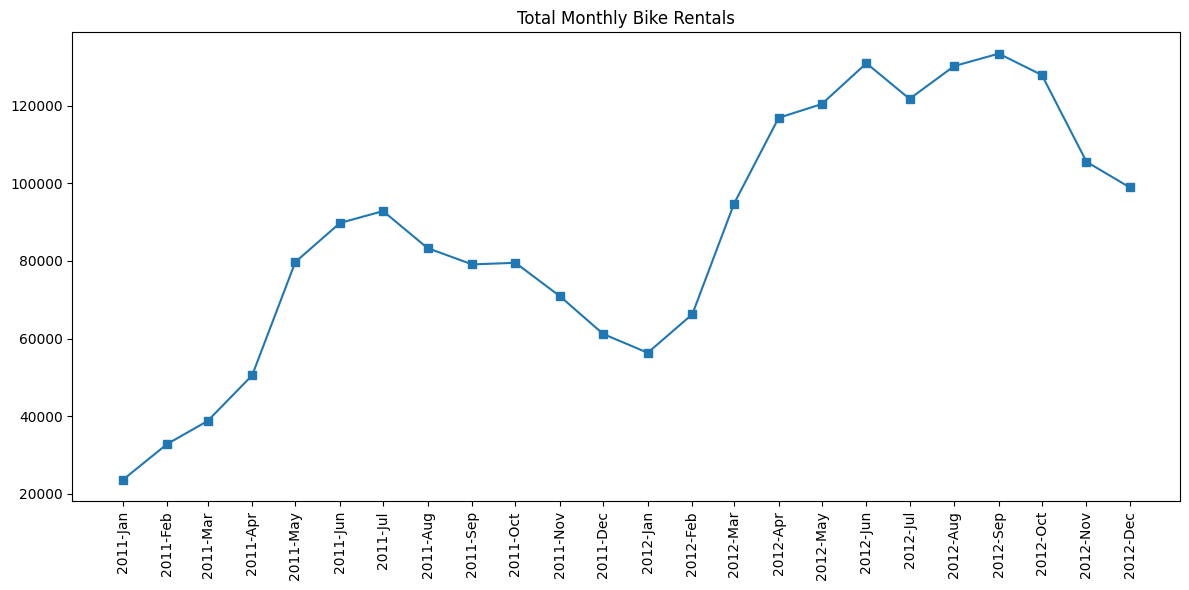

In [38]:
# create the dataset to plot the total rentals
month_sum=yulu.groupby([yulu['datetime'].dt.year,yulu['datetime'].dt.month])['count'].sum().to_frame()
month_sum.index.names=['year','month']
month_sum=month_sum.reset_index()
month_sum['datetime'] = pd.to_datetime(month_sum[['year', 'month']].assign(day=1))

# Setting up the canvas
plt.figure(figsize=(12,6))

# Plotting commands
plt.plot(month_sum['datetime'], month_sum['count'], marker='s', linestyle='solid')

# Title
plt.title(f"Total Monthly Bike Rentals")

# Labels
plt.xticks(month_sum['datetime'], month_sum['datetime'].dt.strftime('%Y-%b'), rotation=90)

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

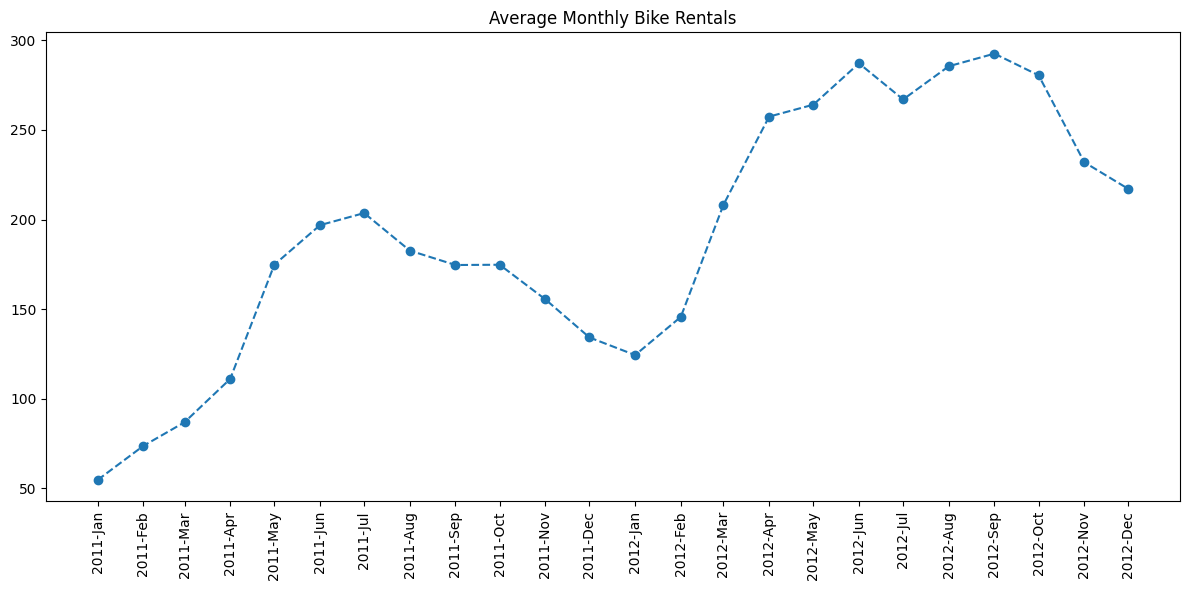

In [39]:
# create the dataset to plot the average rentals
month_sum=yulu.groupby([yulu['datetime'].dt.year,yulu['datetime'].dt.month])['count'].mean().to_frame()
month_sum.index.names=['year','month']
month_sum=month_sum.reset_index()
month_sum['datetime'] = pd.to_datetime(month_sum[['year', 'month']].assign(day=1))

# Setting up the canvas
plt.figure(figsize=(12,6))

# Plotting commands
plt.plot(month_sum['datetime'], month_sum['count'], marker='o', linestyle='--')

# Titles
plt.title(f"Average Monthly Bike Rentals")

# Labels
plt.xticks(month_sum['datetime'], month_sum['datetime'].dt.strftime('%Y-%b'), rotation=90)

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

**Trend Overview:**
Analyzing the "Total Monthly Bike Rentals" alongside the "Average Monthly Bike Rentals" reveals a consistent seasonal usage pattern with noticeable growth over two years. Both datasets exhibit a significant increase in rentals during the warmer mid-year months, peaking typically in June, and a decline during the colder months. This trend highlights a strong seasonal influence on bike usage, with user activity substantially higher in favorable weather conditions. The parallel growth in total and average monthly counts underlines a stable increase in both user base and usage frequency, which can guide Yulu in resource planning and targeted promotions throughout the year.

### Correlation Analysis and Decision on Variables

To understand the relationships between the various features in our dataset, a correlation heatmap was generated. This heatmap reveals how strongly pairs of variables are linearly related to each other, with correlation coefficients ranging from -1 to 1.



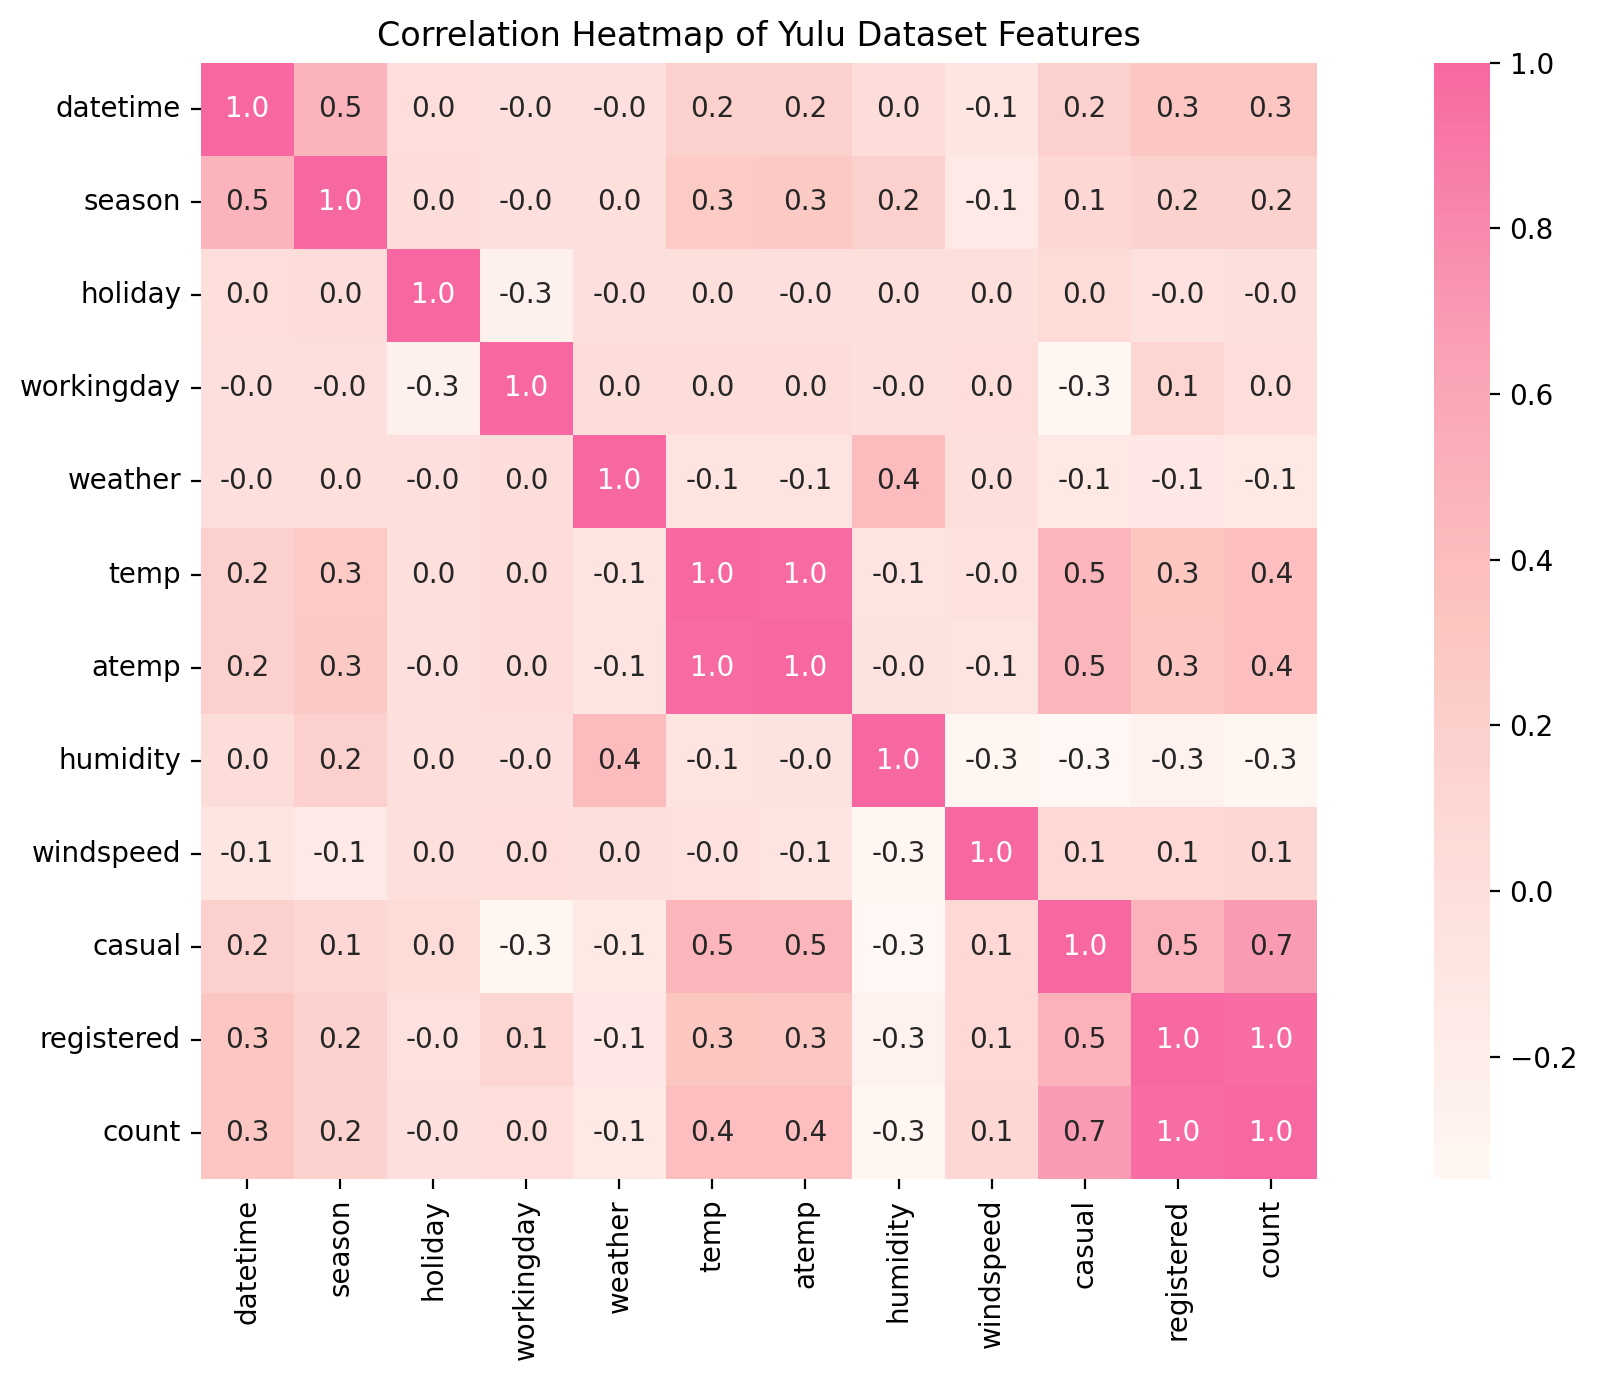

In [40]:
# Setting up the canvas
plt.figure(figsize=(12,7), dpi=200)

# PLoting
sns.heatmap(yulu.corr(), annot=True, center=True, cmap='RdPu', square=True, fmt='.1f')

# Title
plt.title('Correlation Heatmap of Yulu Dataset Features')

# Adjusting the plot
plt.tight_layout()

# Display the plot
plt.show()

### Key Observations:
- **Correlation of `count` with Other Variables**:
  - `registered` has a very high correlation (0.97) with `count`.
  - `casual` also shows a strong correlation (0.69) with `count`.
- **Other Notable Correlations**:
  - `temp` and `atemp` are highly correlated with each other (0.98).
  - `humidity` has a negative correlation with `count` (-0.32).
  - `windspeed` has a positive, but weak, correlation with `count` (0.10).

Given the strong correlations of `registered` and `casual` with `count`, including these variables in our predictive analysis could lead to multicollinearity issues. Therefore, it is prudent to exclude `registered` and `casual` from the analysis to avoid redundancy and ensure a more robust model.

### Updated Variable Consideration:

Based on the correlation analysis, we will focus on the following variables for predicting the demand (`count`):
- **season**
- **holiday**
- **workingday**
- **weather**
- **temp**
- **atemp**
- **humidity**
- **windspeed**

These variables are selected because they do not exhibit overly high correlations with `count` individually and offer diverse insights into the conditions affecting bike rental demand.

By narrowing our focus to these variables, we aim to build a more effective analysis that can better capture the underlying patterns in the data without being overwhelmed by collinearity. This will help in generating more accurate predictions and actionable insights for Yulu's strategic planning.

## **UNIVARIATE ANALYSIS**

Univariate analysis is the simplest form of analyzing data where we examine each variable individually. The goal is to summarize and find patterns in the data for each variable. This analysis helps us understand the distribution, central tendency, and variability of individual features. For our dataset, we will conduct univariate analysis on both categorical and numerical variables to uncover insights that could influence the demand for Yulu's shared electric cycles.

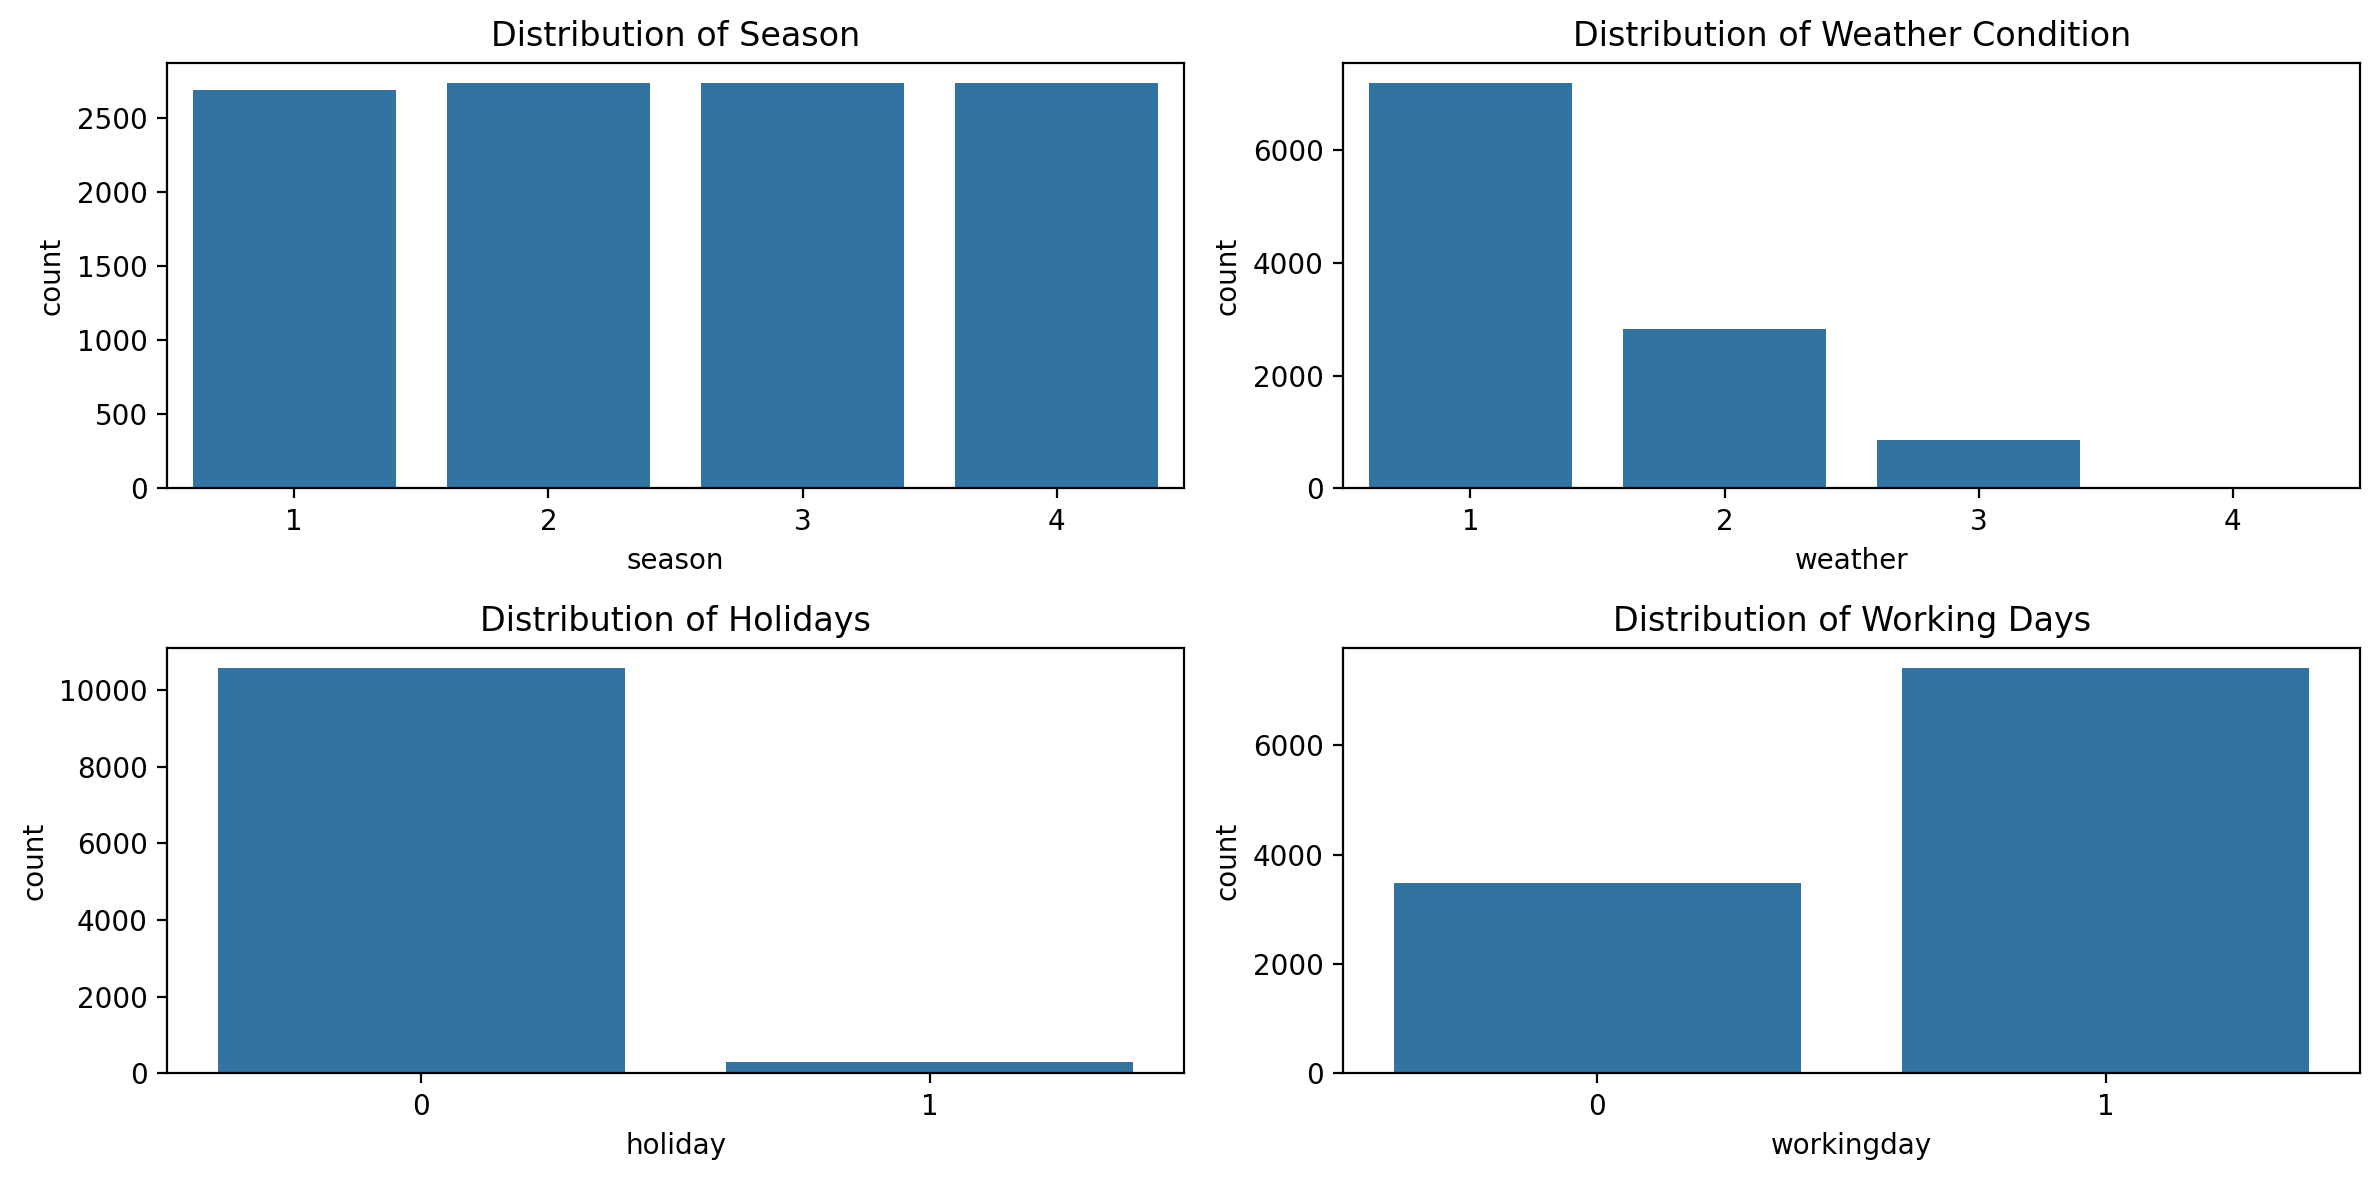

In [41]:
# Setting up the canvas
fig,axs=plt.subplots(ncols=2, nrows=2, figsize=(12,6), dpi=200)

# Plotting commands
sns.countplot(data=yulu, x='season', ax=axs[0,0])
sns.countplot(data=yulu, x='weather', ax=axs[0,1])
sns.countplot(data=yulu, x='holiday', ax=axs[1,0])
sns.countplot(data=yulu, x='workingday', ax=axs[1,1])

# Titles
axs[0, 0].set_title('Distribution of Season')
axs[0, 1].set_title('Distribution of Weather Condition')
axs[1, 0].set_title('Distribution of Holidays')
axs[1, 1].set_title('Distribution of Working Days')

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

### Observations

- **Distribution of Season:**
  The count of bike rentals is equally distributed across the four seasons.

- **Distribution of Weather Condition:**
  The weather condition labeled as '1' (Clear, Few clouds, Partly cloudy) has the majority of counts compared to other weather conditions. The weather condition labeled as '4' (Heavy Rain, Ice Pellets, Thunderstorm, Mist, Snow, Fog) is observed only once.

- **Distribution of Holidays:**
  Non-holidays dominate the count of bike rentals.

- **Distribution of Working Days:**
  The count of rentals on weekdays (working days) is significantly higher than on weekends (non-working days).

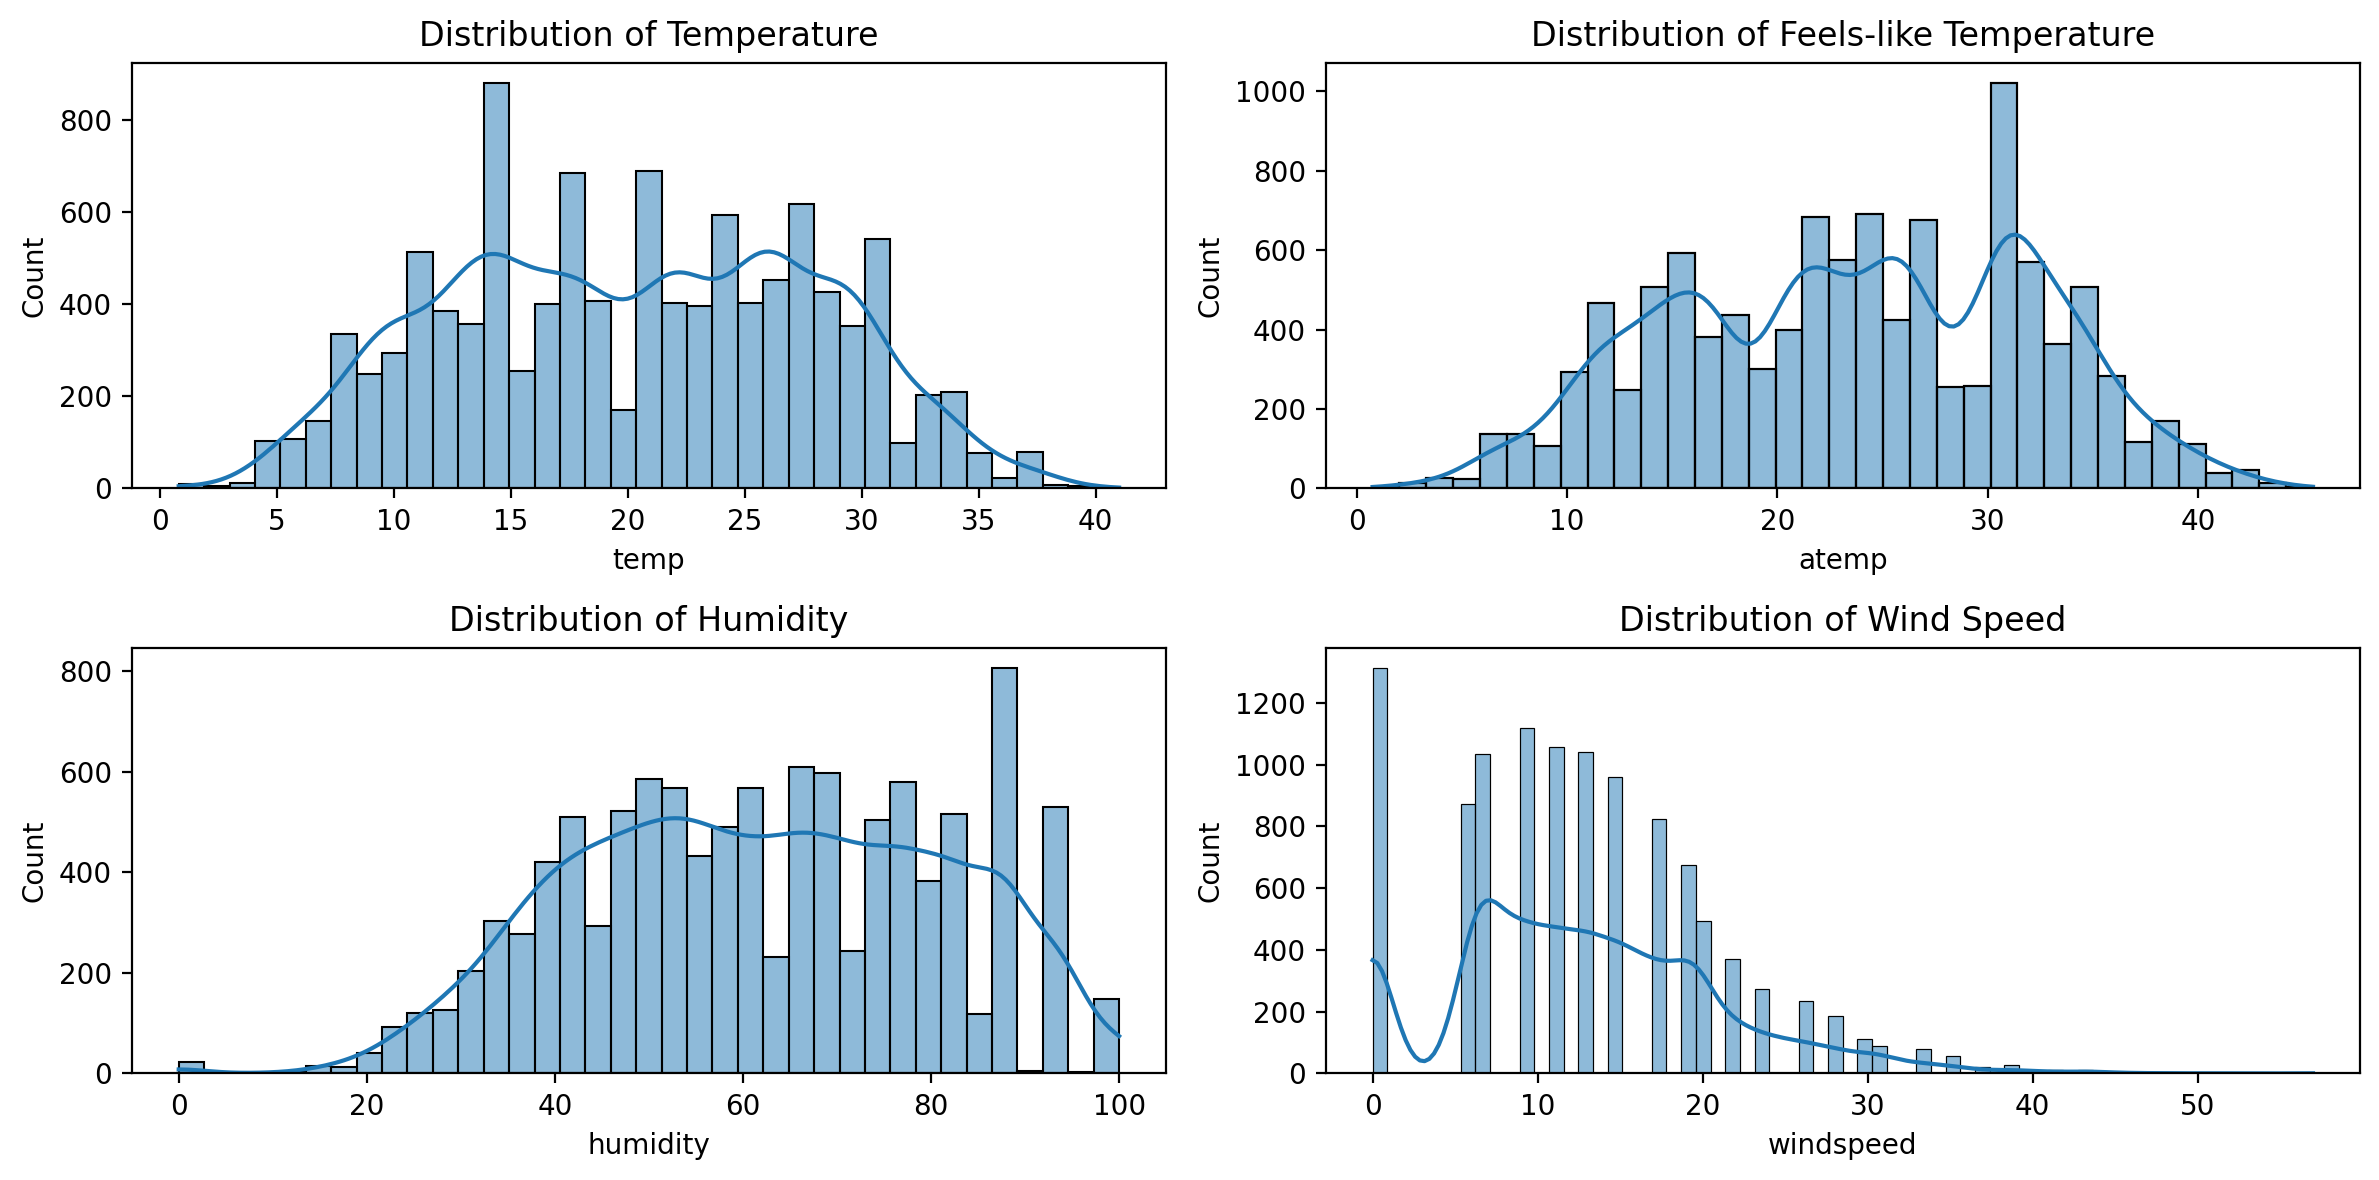

In [42]:
# Setting up the canvas
fig,axs=plt.subplots(ncols=2, nrows=2, figsize=(12,6), dpi=200)

# Plotting commands
sns.histplot(data=yulu, x='temp', kde=True, ax=axs[0,0])
sns.histplot(data=yulu, x='atemp', kde=True, ax=axs[0,1])
sns.histplot(data=yulu, x='humidity', kde=True, ax=axs[1,0])
sns.histplot(data=yulu, x='windspeed', kde=True, ax=axs[1,1])

# Titles
axs[0, 0].set_title('Distribution of Temperature')
axs[0, 1].set_title('Distribution of Feels-like Temperature')
axs[1, 0].set_title('Distribution of Humidity')
axs[1, 1].set_title('Distribution of Wind Speed')

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

### Observations

- **Distribution of Temperature:**
  The temperature distribution appears to be approximately normal, with most values ranging from 11°C to 31°C. The temperature around 14°C has the highest count, indicating that this is the most common temperature.

- **Distribution of Feels-like Temperature:**
  The feels-like temperature distribution closely follows the actual temperature distribution, with a small difference in the distribution pattern. The temperature around 31°C has the major count, reflecting the correlation between actual and feels-like temperatures.

- **Distribution of Humidity:**
  The humidity distribution is left-skewed, with the majority of values falling between 40% and 85%. This indicates that higher humidity levels are more common.

- **Distribution of Wind Speed:**
  The wind speed distribution is somewhat uneven, with a significant peak at 0, indicating that there are many instances with no wind. The rest of the values are more evenly distributed across the range.

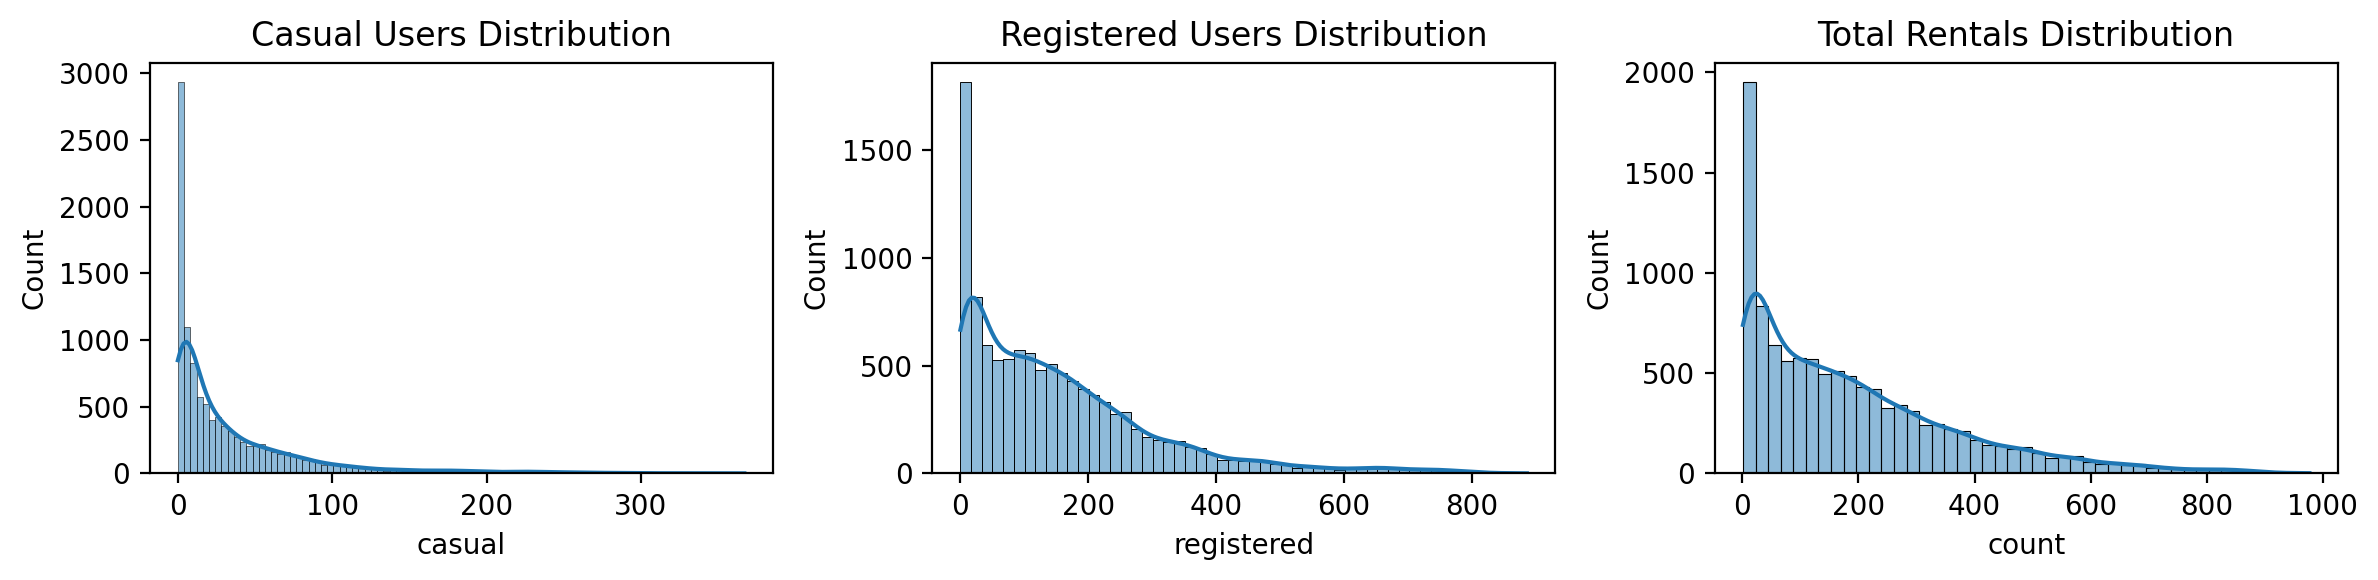

In [43]:
# Setting up the canvas
fig,axs=plt.subplots(ncols=3, nrows=1, figsize=(12,3), dpi=200)

# Plotting commands
sns.histplot(data=yulu, x='casual', kde=True, ax=axs[0])
sns.histplot(data=yulu, x='registered', kde=True, ax=axs[1])
sns.histplot(data=yulu, x='count', kde=True, ax=axs[2])

# Titles
axs[0].set_title('Casual Users Distribution')
axs[1].set_title('Registered Users Distribution')
axs[2].set_title('Total Rentals Distribution')

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

### Observations

- **Casual Users Distribution:**
  The distribution of casual users is right-skewed, with most counts being relatively low. This indicates that casual users tend to rent bikes less frequently.

- **Registered Users Distribution:**
  The distribution of registered users is also right-skewed, but it shows a higher frequency of higher counts compared to casual users. This suggests that registered users are more consistent in their bike rentals.

- **Total Rentals Distribution:**
  The total rentals distribution is right-skewed as well, which aligns with the patterns observed in both casual and registered user distributions. The total rentals reflect the combined behavior of both user types, with higher rental counts being less frequent but significant when they occur.

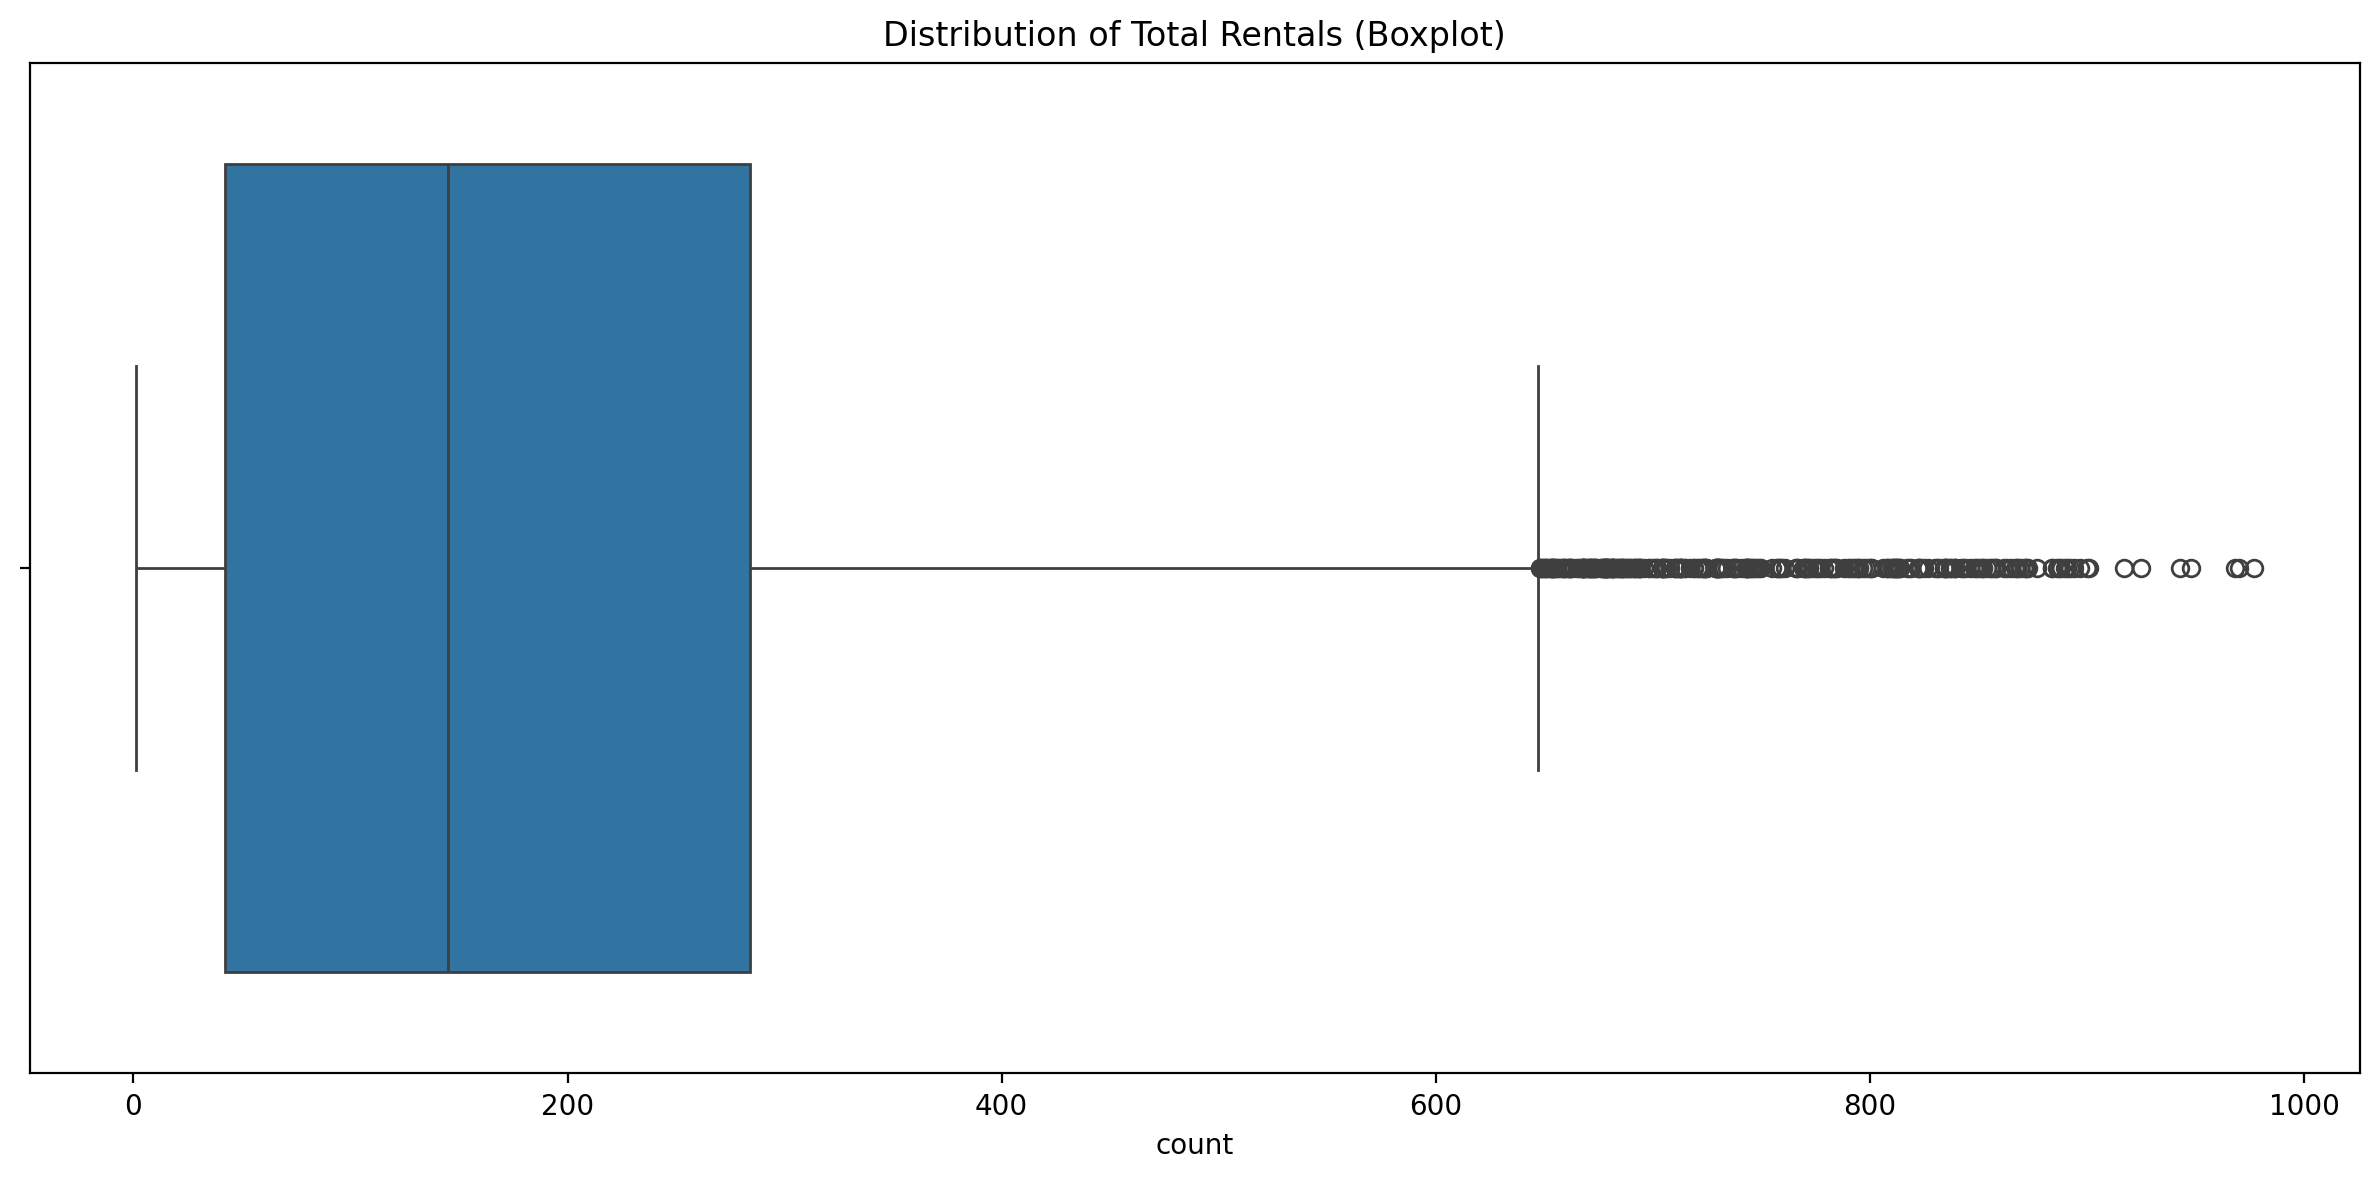

In [44]:
# Setting up the canvas
fig,axs=plt.subplots(figsize=(12,6), dpi=200)

# Plotting commands
sns.boxplot(data=yulu, x='count')

# Titles
axs.set_title('Distribution of Total Rentals (Boxplot)')

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

In [45]:
Q1=yulu['count'].quantile(0.25)
Q3=yulu['count'].quantile(0.75)

IQR = Q3-Q1

upper=Q3+(1.5*IQR)

yulu.loc[yulu['count']>upper].shape

(300, 12)

### Observations

The boxplot displaying the distribution of total rentals, there are approximately 300 outliers, indicating rental counts significantly higher than typical daily totals. The range of daily rentals extends from 0 to 647, with outliers extending beyond this upper limit. The median value of rentals is 145 per day. The interquartile range (IQR), which represents the middle 50% of the data, spans from 42 to 284 rentals. This distribution highlights a broad variability in daily rental activities, with specific days experiencing substantially higher usage than usual.

In [46]:
def user_details(x):
    print(f"--{x.upper()} USERS--\n")

    print(f"{x.capitalize()} users over the course of 2 years: {yulu[x].sum()}\n")

    # Finding casual users in 2011 and 2012
    group_year=yulu.groupby(yulu['datetime'].dt.year)[x].sum()
    for i in group_year.index:
        print(f"{x.capitalize()} users in {i}: {yulu.groupby(yulu['datetime'].dt.year)[x].sum()[i]}")

    print('\n')
    # Finding casual users according to the seasons
    season_name=['spring','summer','fall','winter']
    group_season=yulu.groupby(yulu['season'])[x].sum()
    for i,j in zip(group_season.index,season_name):
        print(f"{x.capitalize()} users in {j}: {yulu.groupby(yulu['season'])[x].sum()[i]}")

    print('\n')
    # Finding casual users on working days
    group_day=yulu.groupby(yulu['workingday'])[x].sum()
    for i in group_day.index:
        print(f"{x.capitalize()} users in {i}: {yulu.groupby(yulu['workingday'])[x].sum()[i]}")

    print('\n')

In [47]:
for x in ['casual','registered']:
    user_details(x)

--CASUAL USERS--

Casual users over the course of 2 years: 392135

Casual users in 2011: 155817
Casual users in 2012: 236318


Casual users in spring: 41605
Casual users in summer: 129672
Casual users in fall: 142718
Casual users in winter: 78140


Casual users in 0: 206037
Casual users in 1: 186098


--REGISTERED USERS--

Registered users over the course of 2 years: 1693341

Registered users in 2011: 626162
Registered users in 2012: 1067179


Registered users in spring: 270893
Registered users in summer: 458610
Registered users in fall: 497944
Registered users in winter: 465894


Registered users in 0: 448835
Registered users in 1: 1244506




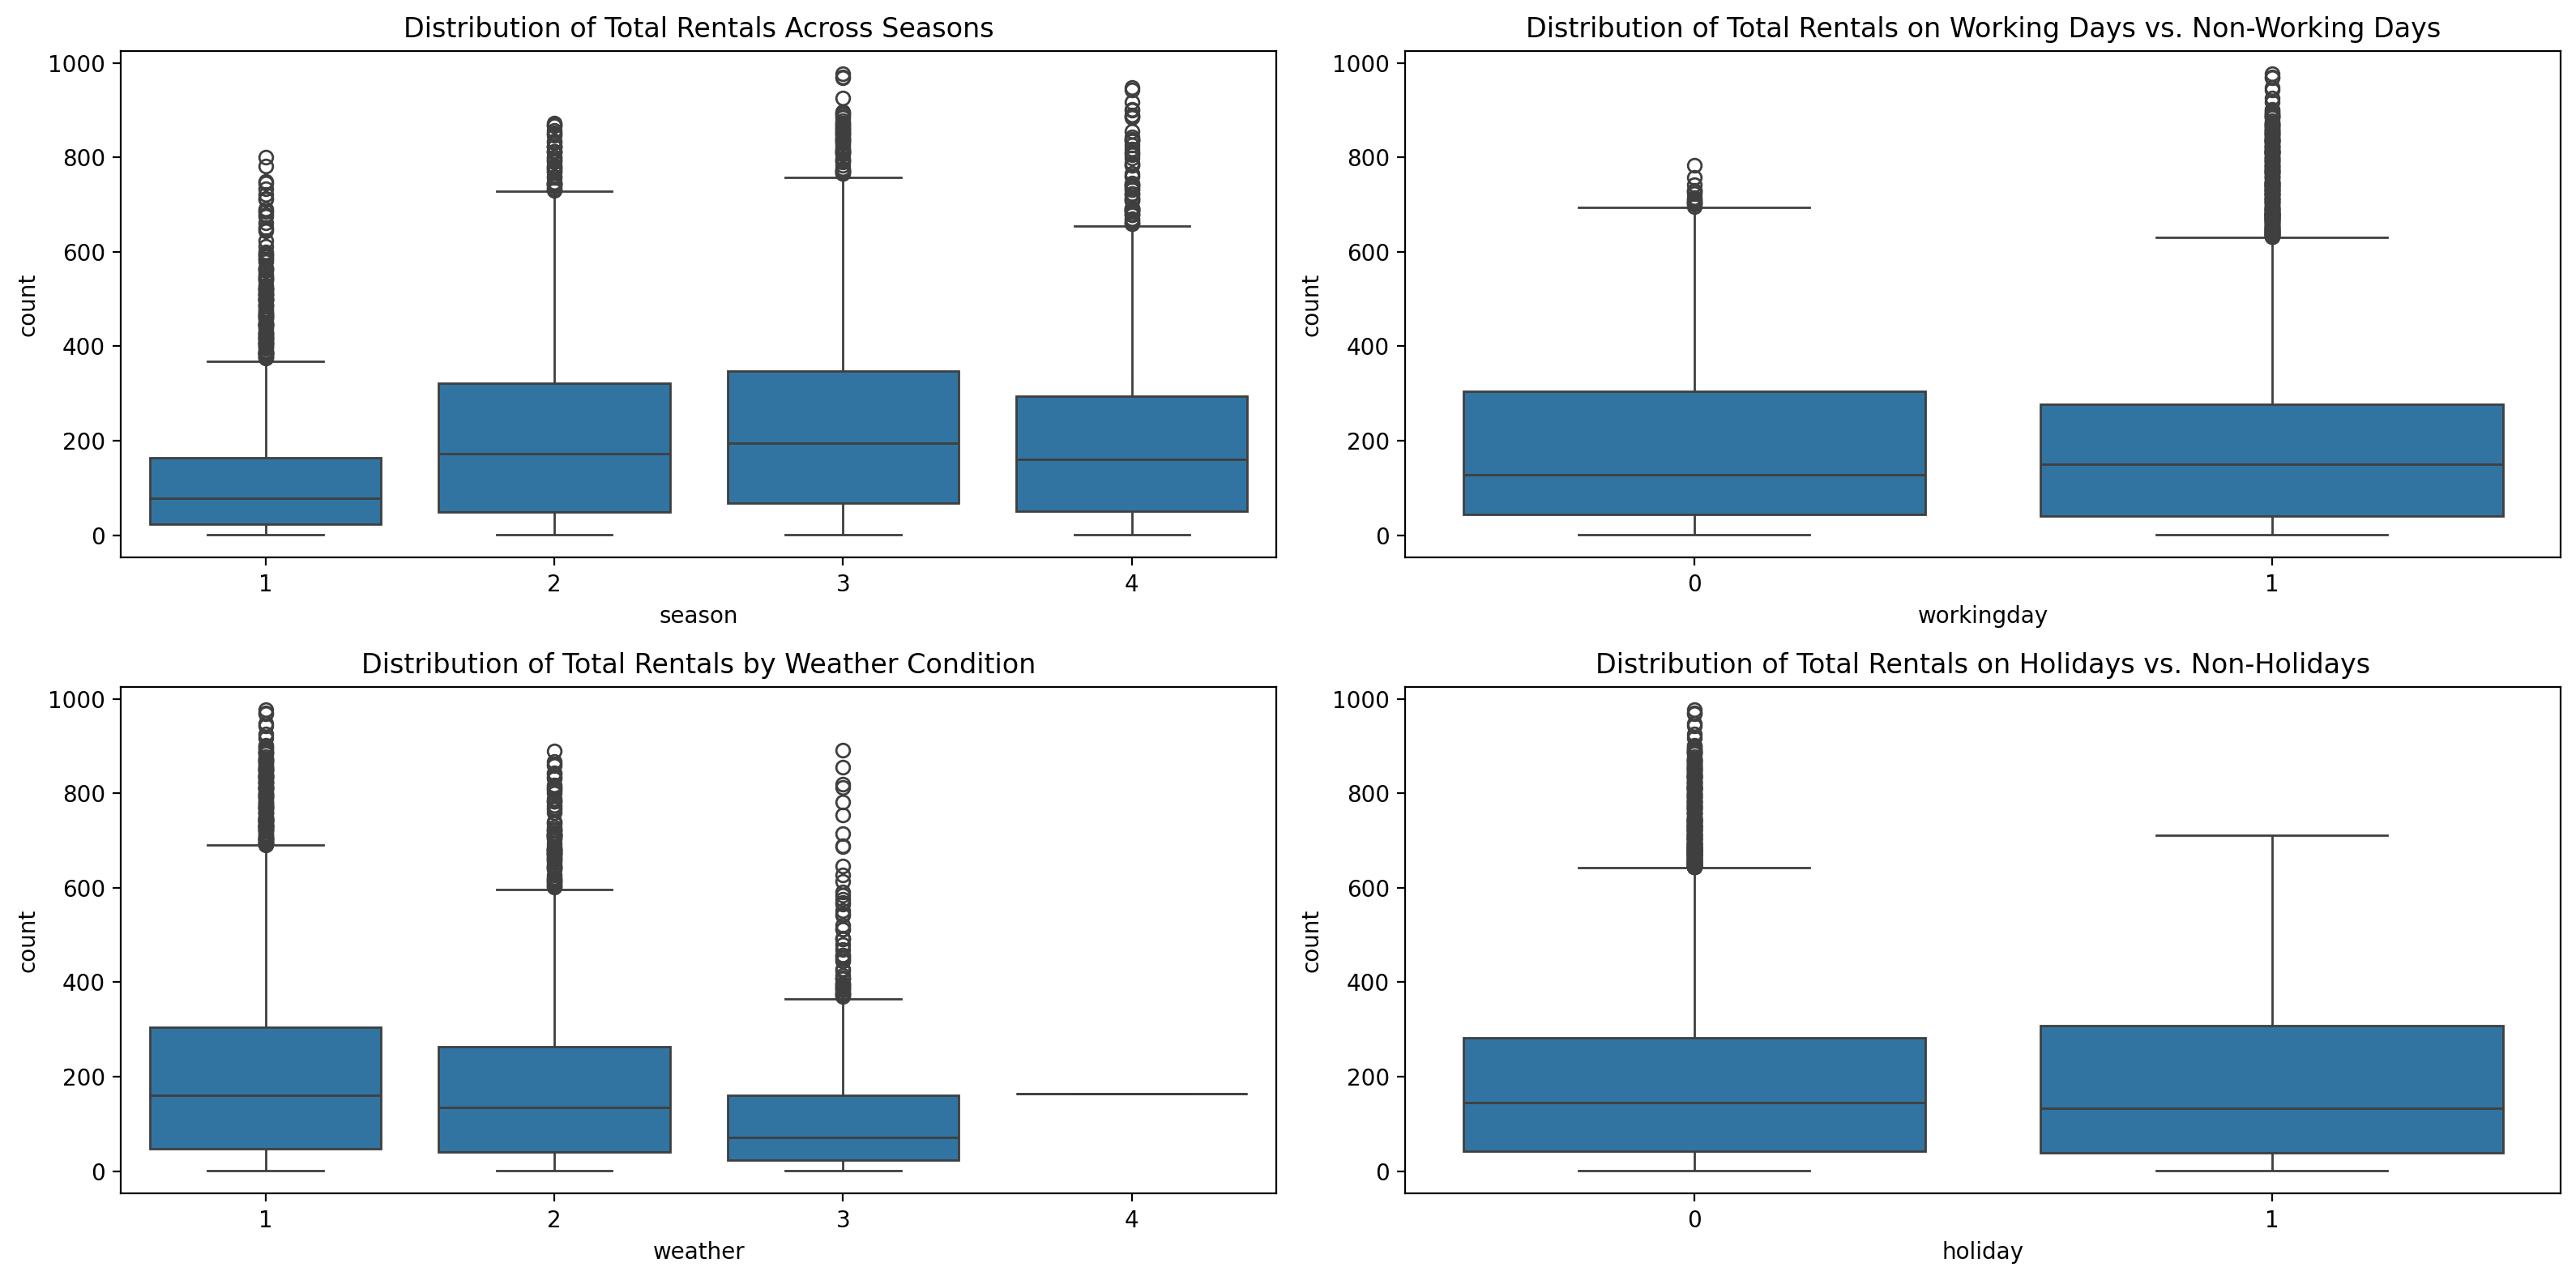

In [48]:
# Setting up the canvas
fig,axs=plt.subplots(ncols=2, nrows=2, figsize=(16,8), dpi=200)

# Plotting commands
sns.boxplot(data=yulu, x='season', y='count', ax=axs[0,0])
sns.boxplot(data=yulu, x='workingday', y='count', ax=axs[0,1])
sns.boxplot(data=yulu, x='weather', y='count', ax=axs[1,0])
sns.boxplot(data=yulu, x='holiday', y='count', ax=axs[1,1])

# Titles
axs[0, 0].set_title('Distribution of Total Rentals Across Seasons')
axs[0, 1].set_title('Distribution of Total Rentals on Working Days vs. Non-Working Days')
axs[1, 0].set_title('Distribution of Total Rentals by Weather Condition')
axs[1, 1].set_title('Distribution of Total Rentals on Holidays vs. Non-Holidays')

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

### Observations

- **Distribution of Total Rentals Across Seasons:**
  The median count of rentals in Season 1 (Spring) is noticeably lower compared to other seasons. This suggests that bike rental demand is typically less during the spring.

- **Distribution of Total Rentals by Weather Condition:**
  The majority of rentals occur under Weather Condition 1, which likely represents the most favorable weather (e.g., clear, few clouds). Rentals significantly drop as the weather conditions worsen, with Weather Condition 4 showing a drastic reduction in rentals, highlighted by the lower median and much fewer data points near 200 rentals.

- **Distribution of Total Rentals on Holidays vs. Non-Holidays:**
  Interestingly, the median rental counts on holidays and non-holidays are quite similar, indicating that holidays do not significantly affect the overall demand for bike rentals.

- **Distribution of Total Rentals on Working Days vs. Non-Working Days:**
  The observation regarding similar median counts on working and non-working days suggests a consistent demand across these days, possibly hinting that the rentals are used both for commuting and leisure regardless of the working day status.

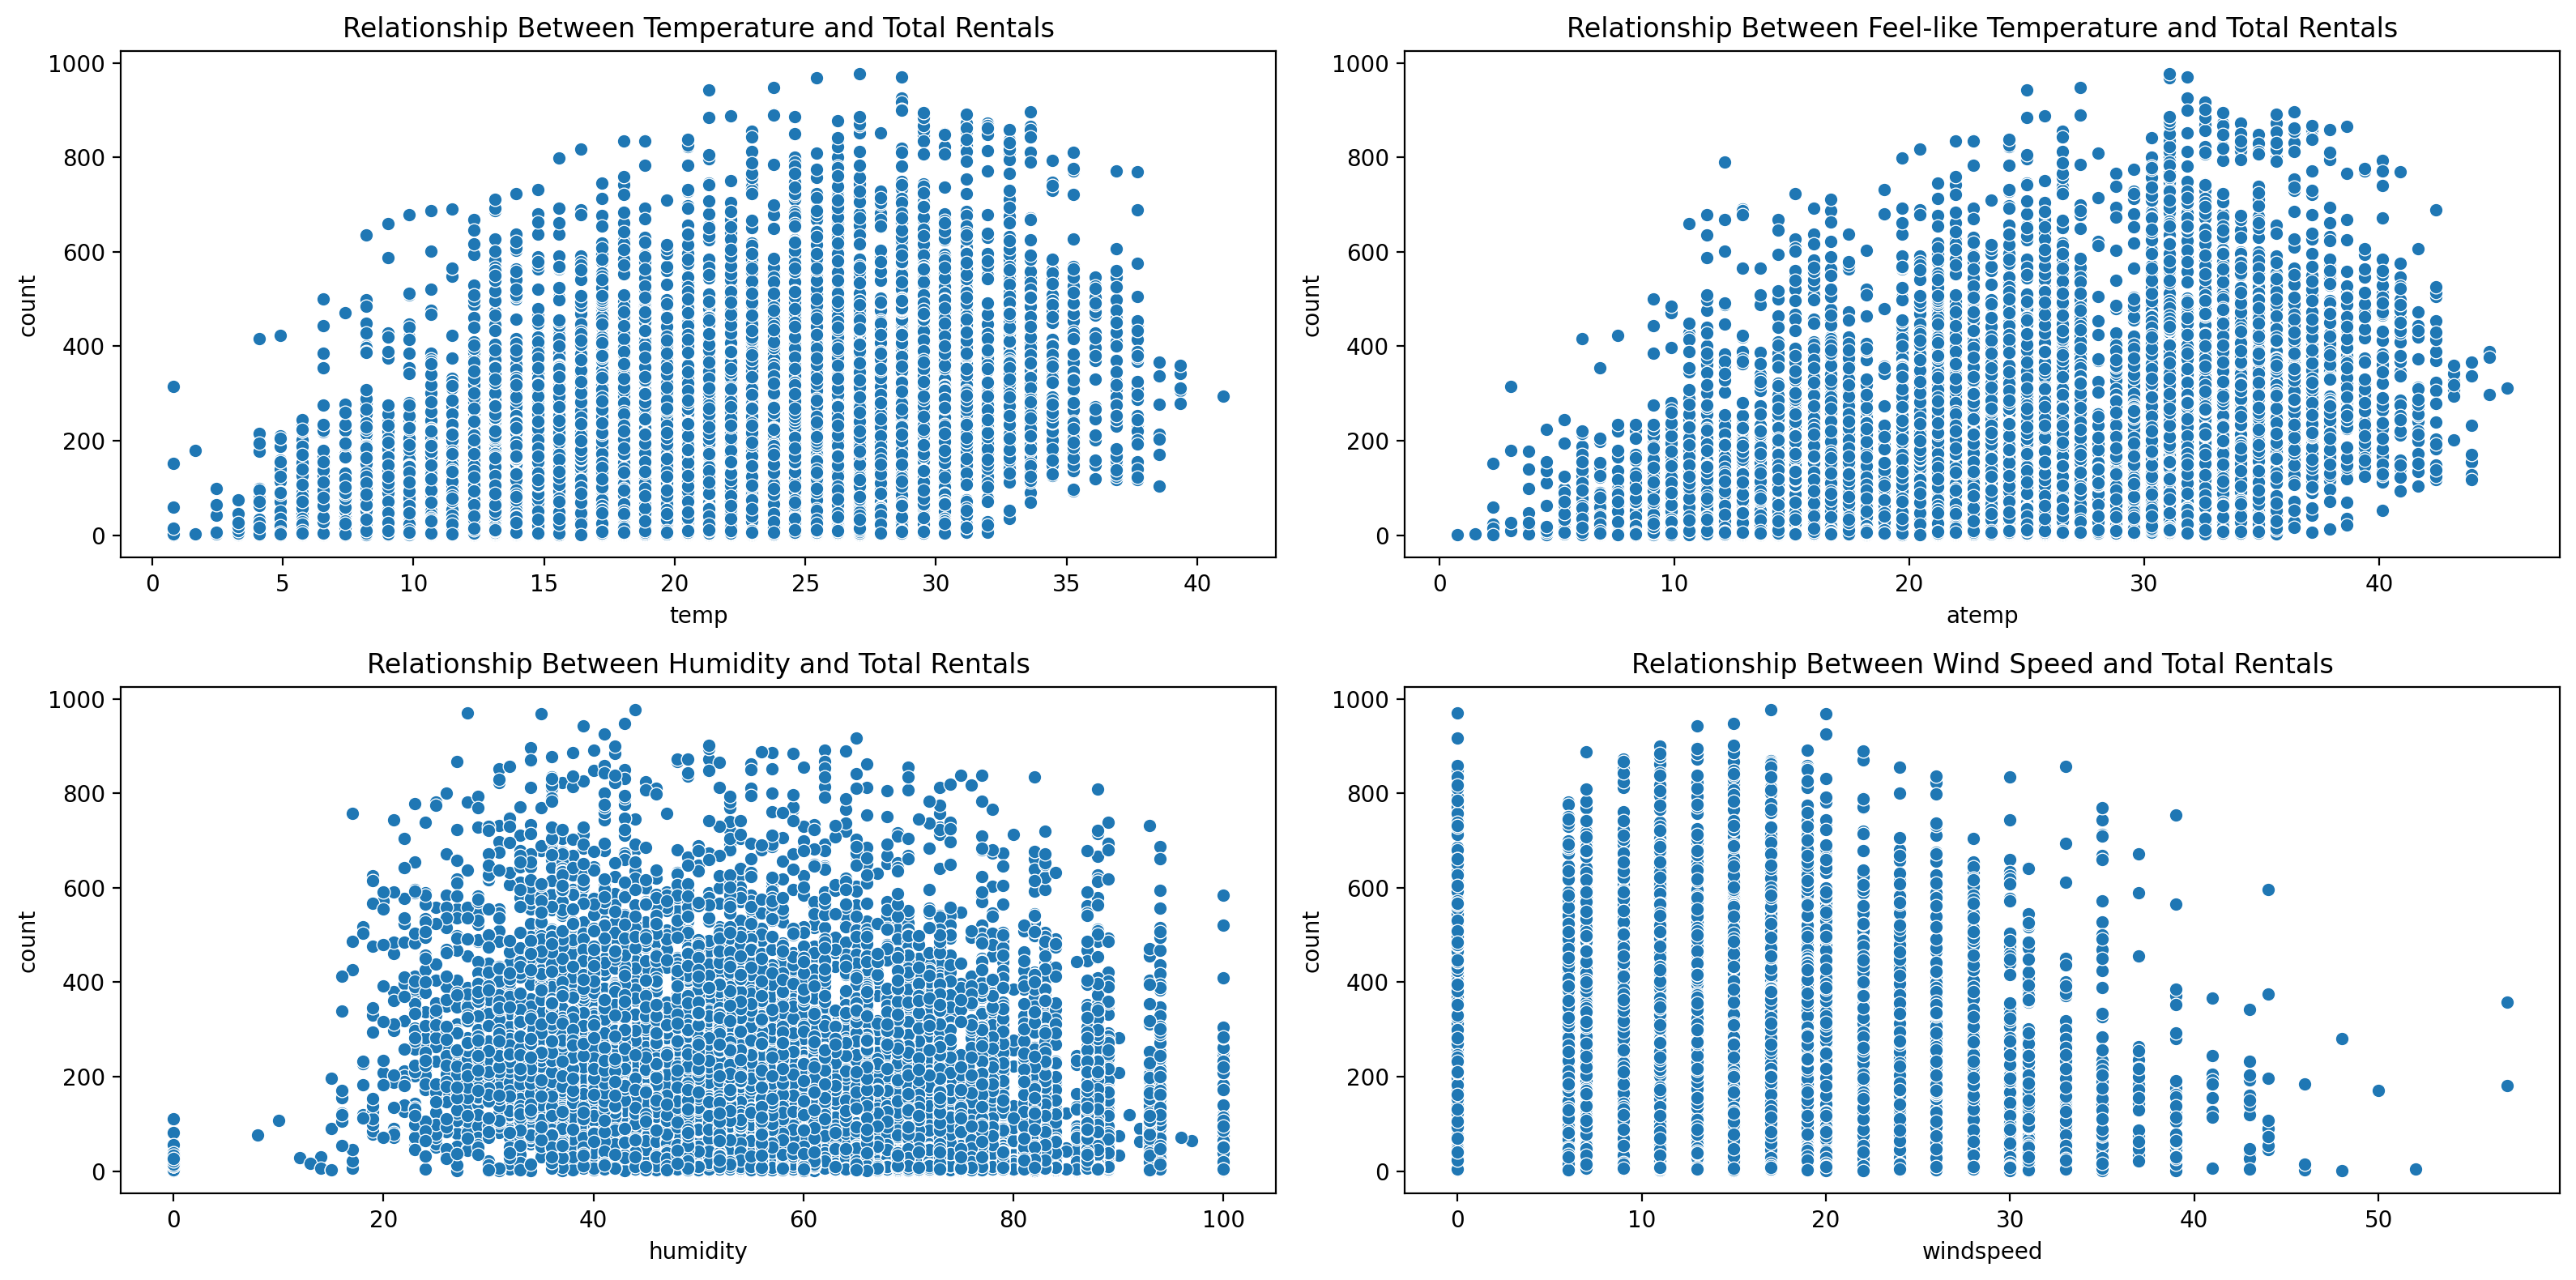

In [49]:
# Setting up the canvas
fig,axs=plt.subplots(ncols=2, nrows=2, figsize=(16,8), dpi=200)

# Plotting commands
sns.scatterplot(data=yulu, x='temp', y='count', ax=axs[0,0])
sns.scatterplot(data=yulu, x='atemp', y='count', ax=axs[0,1])
sns.scatterplot(data=yulu, x='humidity', y='count', ax=axs[1,0])
sns.scatterplot(data=yulu, x='windspeed', y='count', ax=axs[1,1])

# Titles
axs[0, 0].set_title('Relationship Between Temperature and Total Rentals')
axs[0, 1].set_title('Relationship Between Feel-like Temperature and Total Rentals')
axs[1, 0].set_title('Relationship Between Humidity and Total Rentals')
axs[1, 1].set_title('Relationship Between Wind Speed and Total Rentals')

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

In [50]:
yulu['day_type']=yulu['datetime'].dt.day_name().apply(lambda x: 'weekend' if x in ['Saturday','sunday'] else 'weekday')
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,weekend
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,weekend
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,weekend
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,weekend
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,weekend


In [51]:
from scipy.stats import ttest_ind

h0='There is no significant difference between the no. of bike rides on Weekdays and Weekends'
h1='There is a significant difference between the no. of bike rides on Weekdays and Weekends'

a=yulu.loc[yulu['day_type']=='weekend','count']
b=yulu.loc[yulu['day_type']=='weekday','count']

t_stat,p_value=ttest_ind(a,b)

alpha=0.05

if p_value < alpha:
    print(f"Reject h0 i.e., {h1}")
else:
    print(f"Failed to reject h0 i.e., {h0}")

Failed to reject h0 i.e., There is no significant difference between the no. of bike rides on Weekdays and Weekends


In this statistical test, I performed an independent samples t-test to determine whether there is a significant difference in the number of bike rides on weekdays compared to weekends. Here's how you can explain the result in your documentation:

1. **Hypotheses**:
   - Null Hypothesis (H0): There is no significant difference between the number of bike rides on weekdays and weekends.
   - Alternative Hypothesis (H1): There is a significant difference between the number of bike rides on weekdays and weekends.

2. **Statistical Test**:
   - You used the independent samples t-test, which compares the means of two independent groups to determine if there is statistical evidence that the associated population means are significantly different. The test was conducted on two groups: bike rides on weekdays and bike rides on weekends.

3. **Result and Interpretation**:
   - The p-value obtained from the t-test was greater than the significance level (alpha = 0.05), leading to the conclusion "Failed to reject H0". This means that the evidence was insufficient to conclude a difference in the average number of bike rides between weekdays and weekends. Statistically, this suggests that the bike ride patterns are similar during weekdays and weekends.

4. **Implications**:
   - Since no significant difference was found, it suggests that the usage of bikes remains relatively stable throughout the week. This could indicate that bike rentals are used consistently for both commuting purposes during weekdays and leisure activities on weekends, or any variations are not large enough to be statistically significant.

In [52]:
from scipy.stats import ttest_ind

h0='There is no significant difference between the no. of bike rides on Working days and Non working days'
h1='There is a significant difference between the no. of bike rides on Working days and Non working days'

a=yulu.loc[yulu['workingday']==0,'count']
b=yulu.loc[yulu['workingday']==1,'count']

t_stat,p_value=ttest_ind(a,b,alternative='greater')

alpha=0.05

if p_value < alpha:
    print(f"Reject h0 i.e., {h1}")
else:
    print(f"Failed to reject h0 i.e., {h0}")

Failed to reject h0 i.e., There is no significant difference between the no. of bike rides on Working days and Non working days


In [53]:
def qq_hist_plot(a,cat):
    ('''Generate Q-Q plot and histogram for the given data.''')

    import statsmodels.api as sm

    # Setting up the canvas
    fig,axs=plt.subplots(ncols=2, nrows=1, figsize=(12,3), dpi=200)

    # Ploting
    sns.histplot(data=a, kde=True, ax=axs[0])
    sm.qqplot(data=a,line='s', ax=axs[1])

    # Title
    if type(cat)==str:
        plt.suptitle(f"{cat.capitalize()}")
    else:
        plt.suptitle(f"{cat}")

    # Adjusting the plot
    plt.tight_layout()

    # Display
    plt.show()

In [54]:
def check_shapiro(data,cat,cat_column_name,num_column_name):
    ('''Perform the Shapiro-Wilk test for normality on a sample of data from a specific category.''')
    from scipy.stats import shapiro
    # Define hypotheses
    h0='The distribution is gaussian'
    h1='The distribution is not gaussian'

    # Extract the numerical data for the specified category
    a=data.loc[data[cat_column_name]==cat,num_column_name]

    # Implementing the Shapiro-Wilk test for normality
    n=min(len(a),100)
    s_stat,p_value=shapiro(a.sample(n))

    # Define the significance level (alpha)
    alpha=0.05

    # Check the hypothesis based on the p-value
    if p_value < alpha:
        print(f"Reject h0 i.e., {h1}")
    else:
        print(f"Failed to reject h0 i.e., {h0}")

In [55]:
def check_levene(data,cat_column_name,num_column_name):
    ('''Perform Levene's test for equality of variances across multiple categories.''')

    # Import required package
    from scipy.stats import levene

    # Define hypotheses
    h0='The variance is equal'
    h1='The variance is not equal'

    # Extract the numerical data for the specified category
    list_cat=data[cat_column_name].unique()
    a=[data.loc[data[cat_column_name]==cat,num_column_name] for cat in list_cat]

    # Implementing the levene test for normality
    s_stat,p_value=levene(*a)

    # Define the significance level (alpha)
    alpha=0.05

    # Check the hypothesis based on the p-value
    if p_value < alpha:
        print(f"Reject h0 i.e., {h1}")
    else:
        print(f"Failed to reject h0 i.e., {h0}")

In [56]:
def check_assumptions(data,cat_column_name,num_column_name):
    ('''Check the assumptions of normality and equality of variances for the given data across different categories.''')

    list_cat=data[cat_column_name].unique()

    print(f"1.Check for Normality")
    for cat in list_cat:
        a=data.loc[data[cat_column_name] == cat,num_column_name]

        if len(a)<30:
            print(f"Category '{cat}': Cannot plot Q-Q plot and histogram due to sample size < 30.")
        else:
            qq_hist_plot(a,cat)

        if len(a)<50:
            print(f"Category '{cat}': Shapiro cannot be performed due to less sample size")
        else:
            check_shapiro(data,cat,cat_column_name,num_column_name)
        print('\n')

    print(f"2.Check for equality in variance")
    check_levene(data,cat_column_name,num_column_name)

### Approach for Statistical Analysis of Bike Rentals

The statistical analysis was structured to ensure the assumptions of normality and homogeneity of variance were satisfied before performing further parametric tests. The approach was comprehensive, involving visual inspections, normality tests, and variance equality assessments across different categories of data.

#### 1. **Visual Inspection and Normality Check:**
   - **Q-Q Plots and Histograms:** For each category under analysis, Quantile-Quantile (Q-Q) plots and histograms were generated to visually assess the distribution of the data. Q-Q plots help determine if the data follows a normal distribution by comparing it to a theoretical normal distribution. Histograms with kernel density estimates provided a visual inspection of skewness, kurtosis, and the overall shape of the distribution.
   - **Shapiro-Wilk Test:** This test was used to statistically confirm the normality of the data for samples larger than 50. The Shapiro-Wilk test is a powerful method to test the null hypothesis that a sample comes from a normally distributed population. If the p-value from the test was below the significance level (alpha = 0.05), the hypothesis of normal distribution was rejected, indicating non-normality.

#### 2. **Equality of Variance Check:**
   - **Levene's Test:** To assess the assumption of homogeneity of variances (a prerequisite for many parametric tests like ANOVA), Levene's test was applied across multiple categories. This test checks whether multiple samples have equal variances. Similar to the Shapiro-Wilk test, if the p-value from Levene's test was below the significance level, the hypothesis of equal variances was rejected.

#### 3. **Decision on Statistical Test:**
   - Depending on the outcomes of the normality and equality of variance tests, the appropriate statistical test was chosen. If both assumptions were met, an **ANOVA** could be conducted to compare the means across different groups. However, if one or both assumptions were violated, a non-parametric alternative like the **Kruskal-Wallis** test was employed.

This methodical approach ensures the validity of the statistical conclusions drawn from the data. By first confirming the underlying assumptions, the analysis could proceed with the most appropriate statistical tests, thereby providing reliable and robust results.

1.Check for Normality


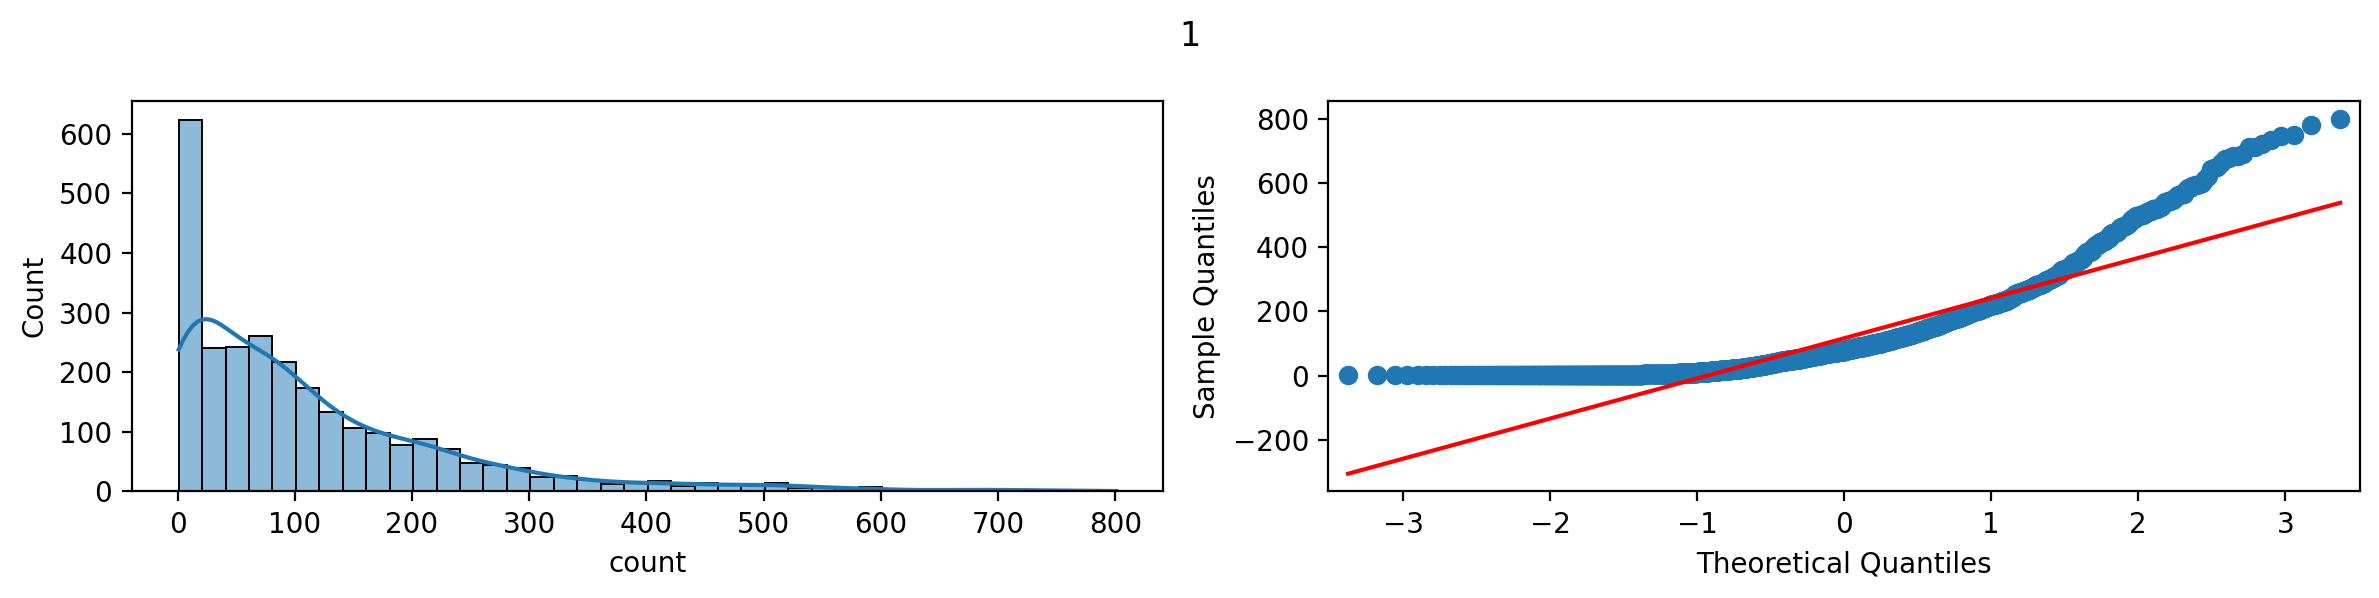

Reject h0 i.e., The distribution is not gaussian




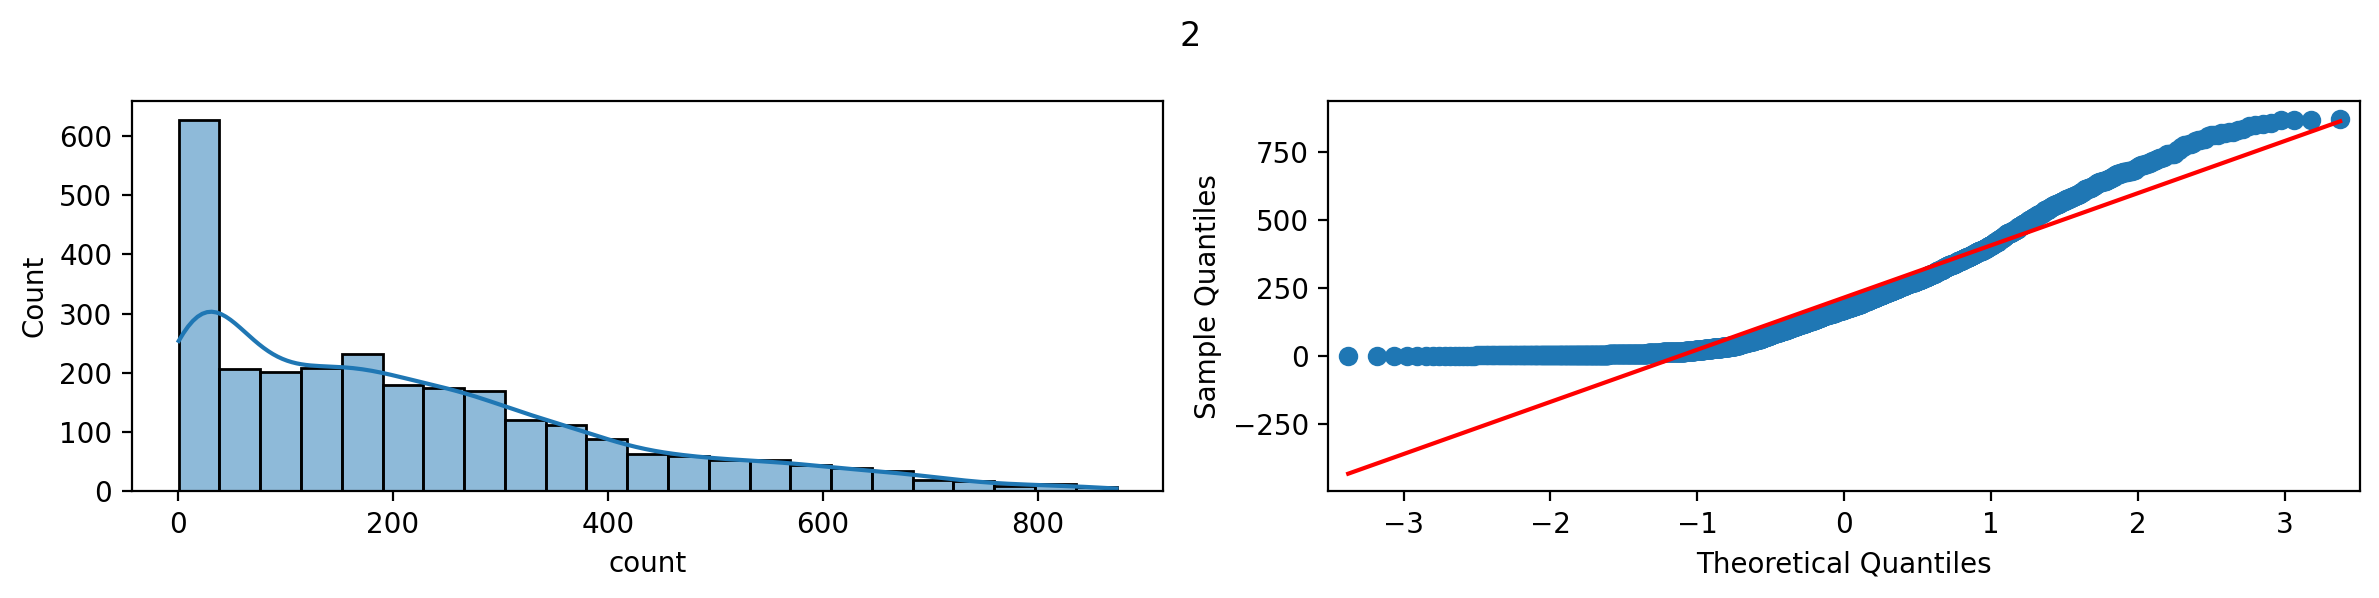

Reject h0 i.e., The distribution is not gaussian




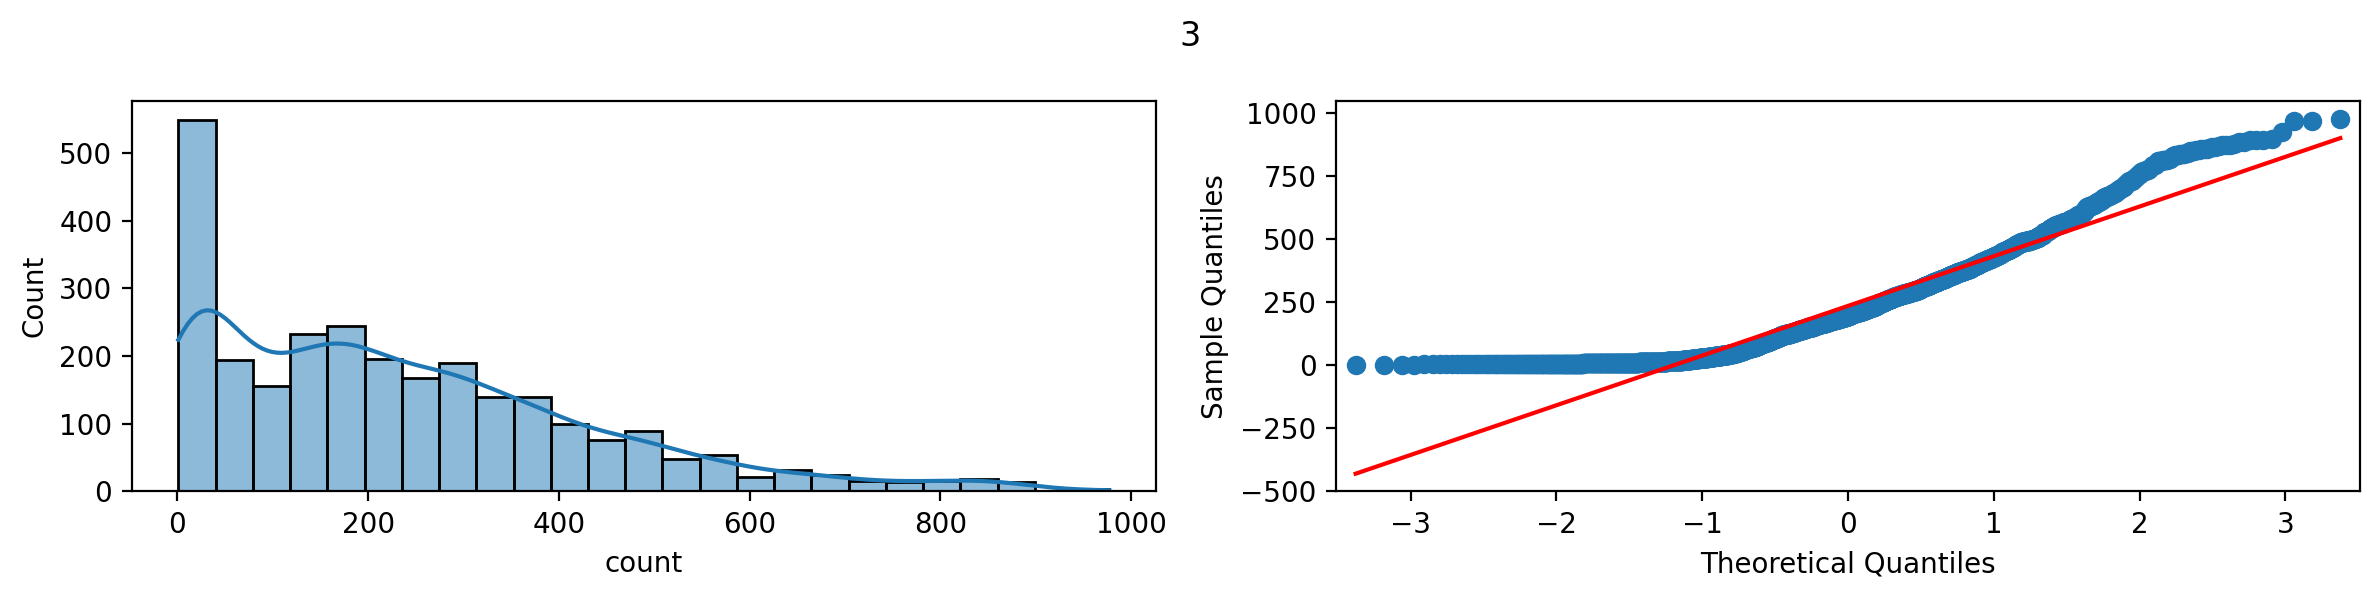

Reject h0 i.e., The distribution is not gaussian




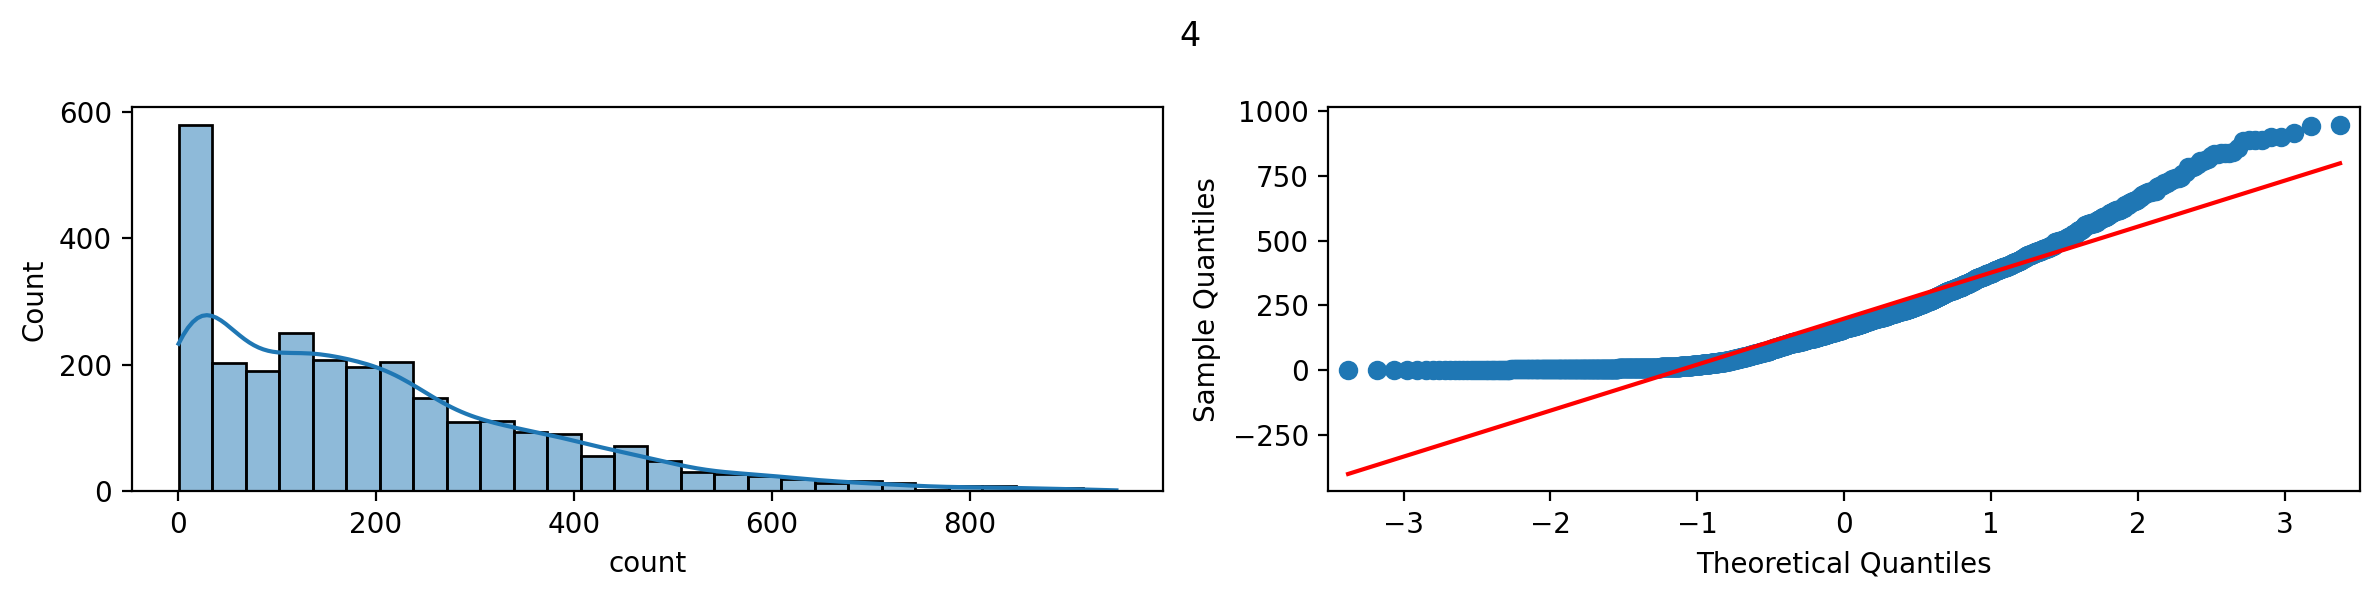

Reject h0 i.e., The distribution is not gaussian


2.Check for equality in variance
Reject h0 i.e., The variance is not equal


In [57]:
check_assumptions(data=yulu,cat_column_name='season',num_column_name='count')

### Assumptions Check for Seasonal Analysis of Bike Rentals

Before conducting detailed statistical analysis on bike rental counts across different seasons, we tested for normality and equality of variances among the groups. Both the Shapiro-Wilk test for normality and Levene's test for equality of variances failed. Due to these results, we will proceed with the Kruskal-Wallis test, a non-parametric method that does not assume normal distribution or equal variances. This approach will help ensure that our findings are robust and valid.

In [58]:
from scipy.stats import kruskal

h0='There is no significant difference between the no. of bike rides on different seasons'
h1='There is a significant difference between the no. of bike rides on different seasons'

a=[yulu.loc[yulu['season']==cat,'count'] for cat in yulu['season'].unique()]

stat,p_value=kruskal(*a)

alpha=0.05

if p_value < alpha:
    print(f"Reject h0 i.e., {h1}")
else:
    print(f"Failed to reject h0 i.e., {h0}")

Reject h0 i.e., There is a significant difference between the no. of bike rides on different seasons


### Result of Kruskal-Wallis Test on Seasonal Bike Rentals

The statistical analysis using the Kruskal-Wallis test indicates a significant difference in the number of bike rentals across different seasons. This result rejects the null hypothesis that there is no significant difference between the number of bike rides in different seasons. This finding suggests that the season significantly affects bike rental frequency, which can be important for planning and operational adjustments in bike rental services.

1.Check for Normality


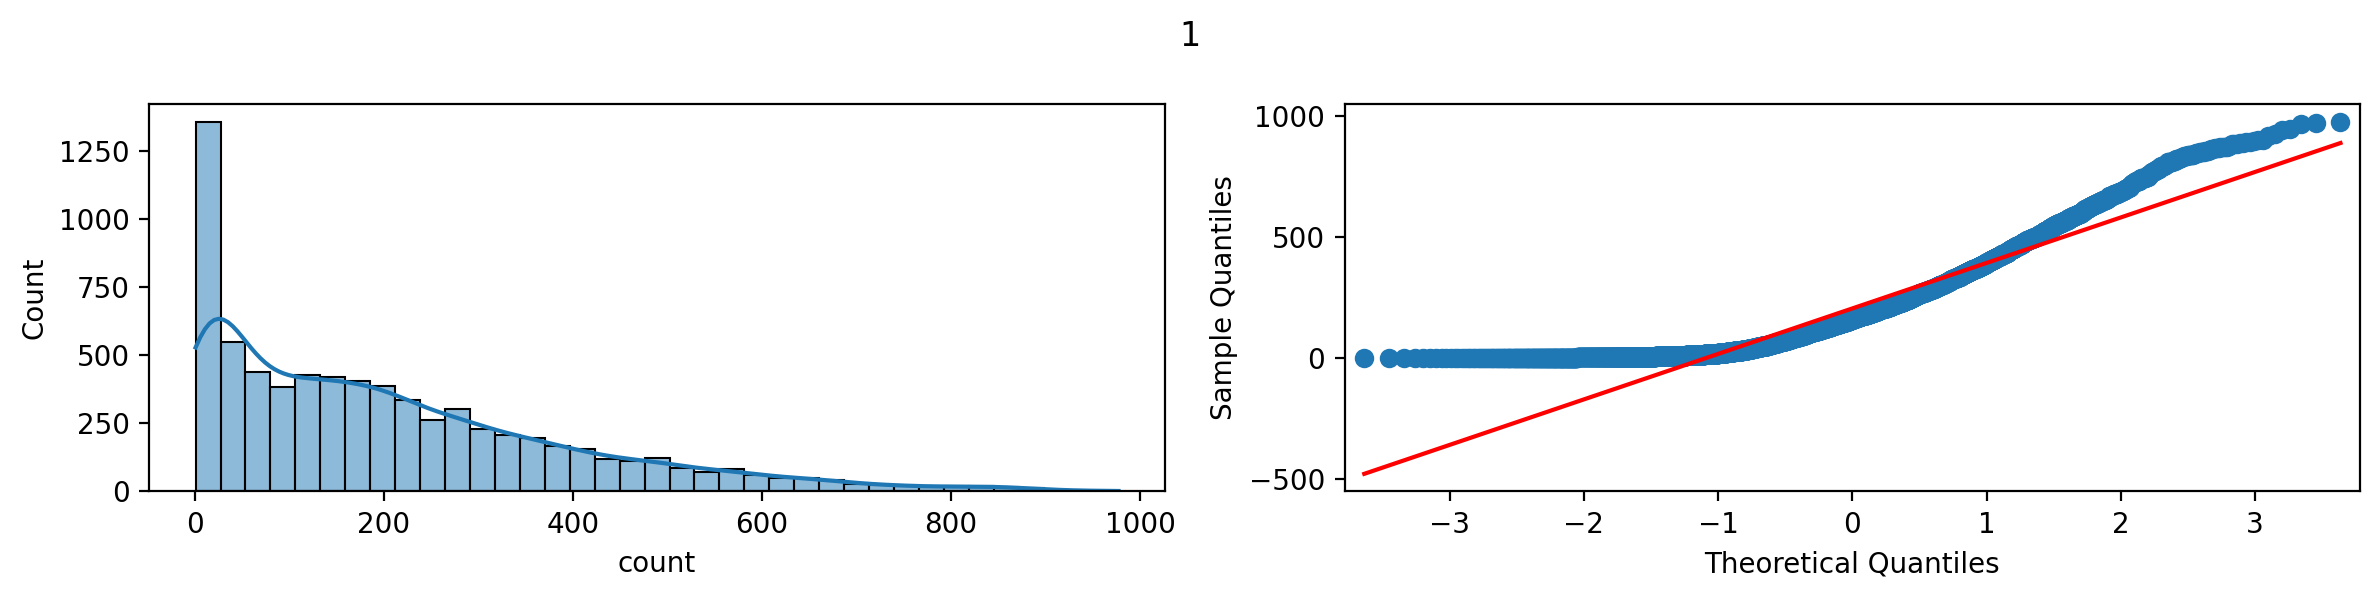

Reject h0 i.e., The distribution is not gaussian




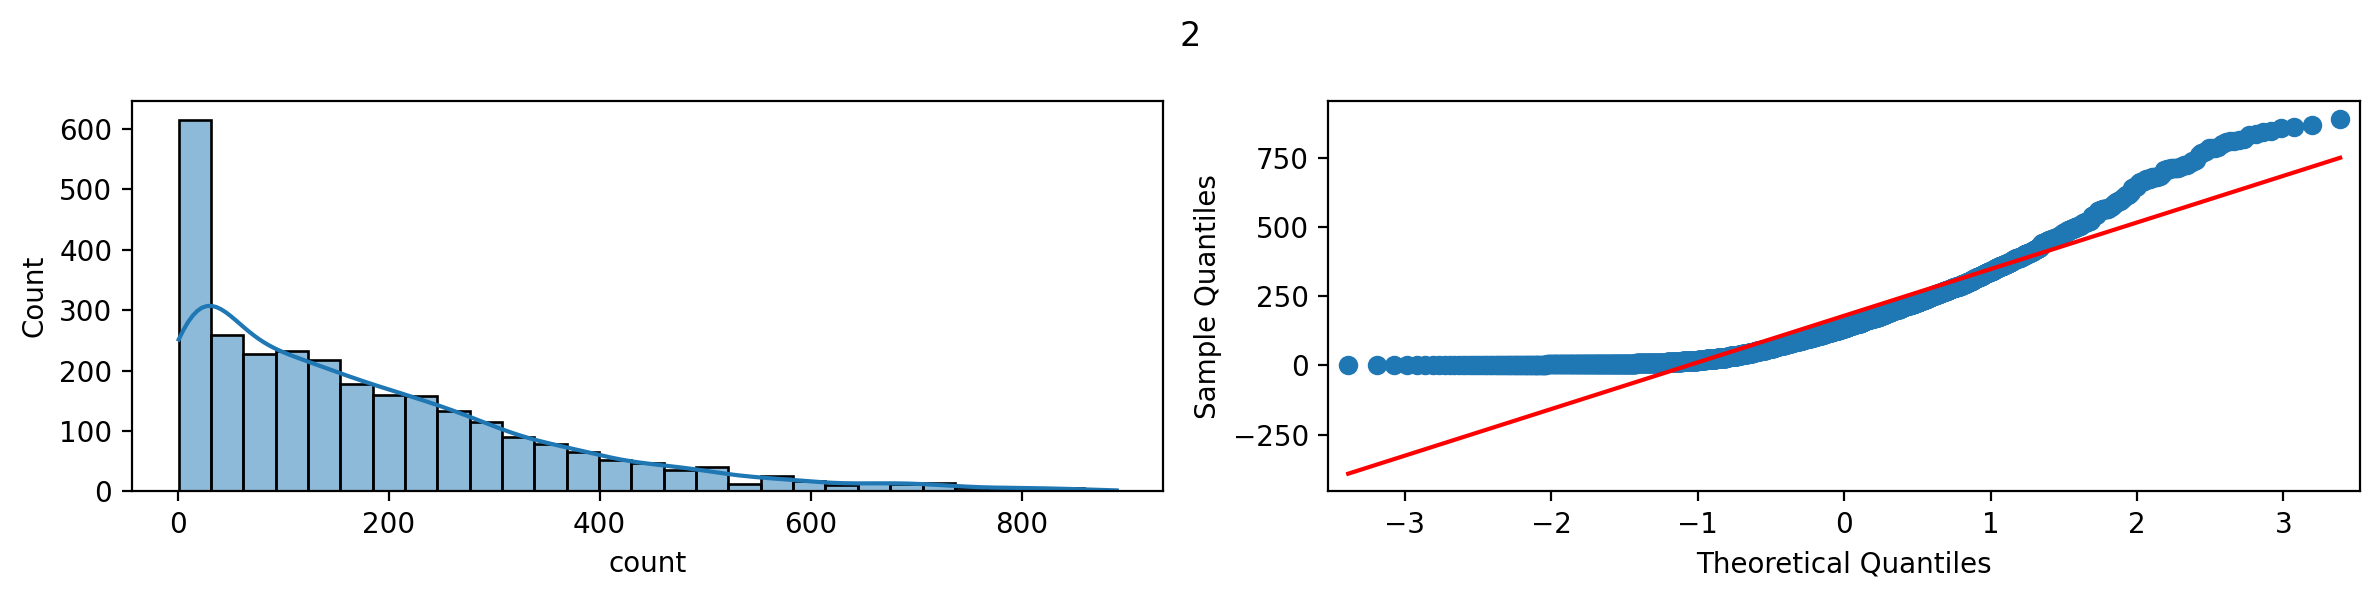

Reject h0 i.e., The distribution is not gaussian




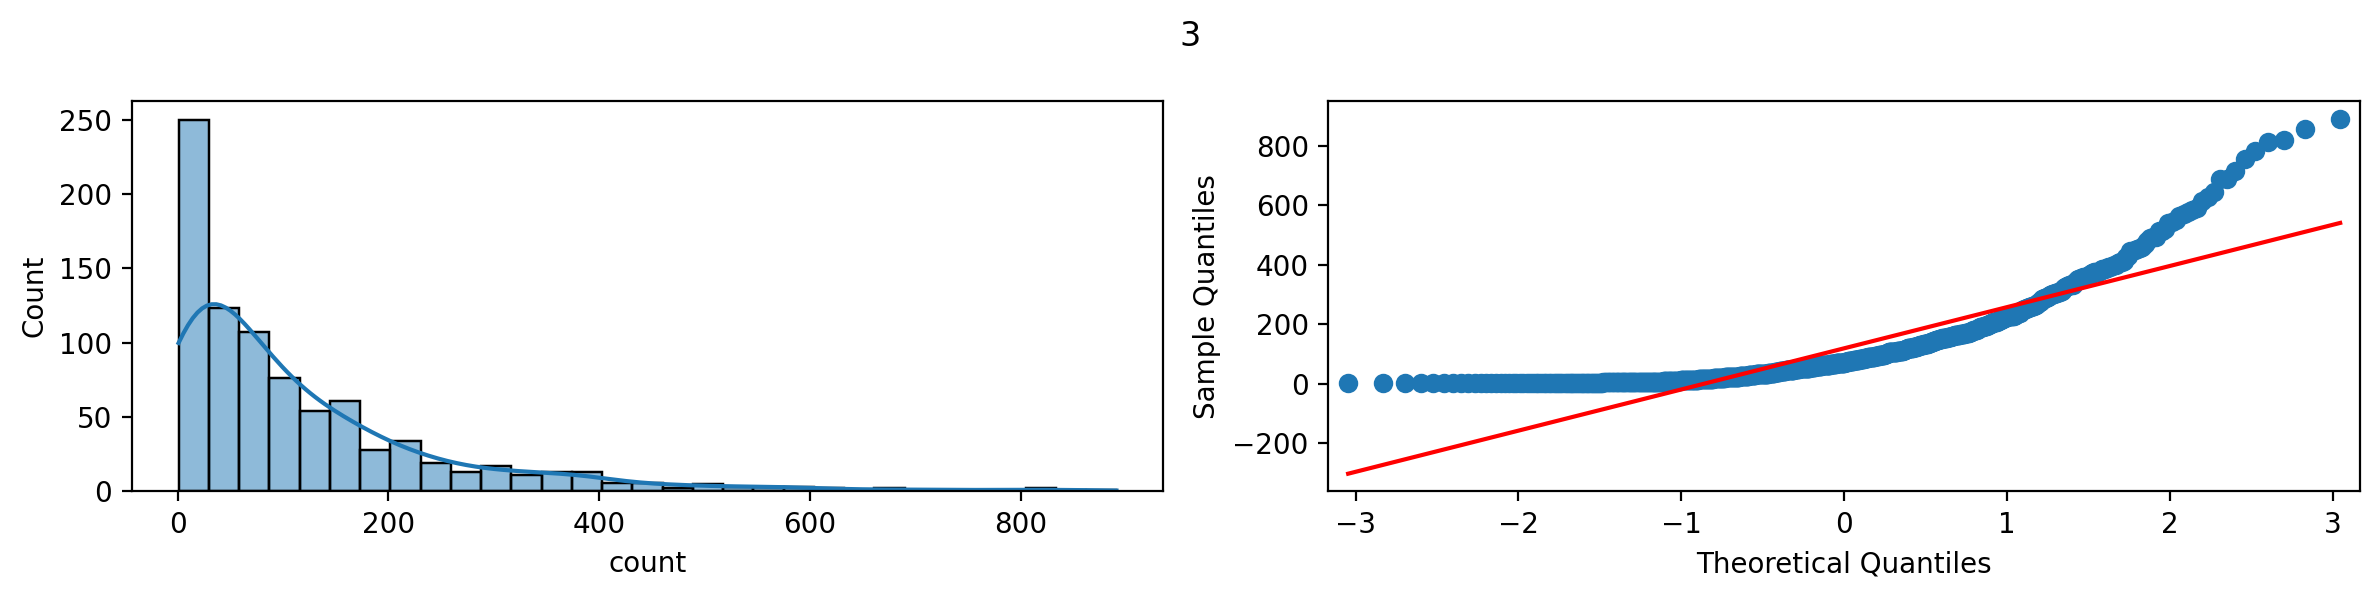

Reject h0 i.e., The distribution is not gaussian


Category '4': Cannot plot Q-Q plot and histogram due to sample size < 30.
Category '4': Shapiro cannot be performed due to less sample size


2.Check for equality in variance
Reject h0 i.e., The variance is not equal


In [59]:
check_assumptions(data=yulu,cat_column_name='weather',num_column_name='count')

### Assumption Checks for Weather Conditions

1. **Normality and Variance Checks:**
   - The dataset failed both the normality and equality of variance tests for different weather conditions. This is crucial because these tests determine the appropriateness of parametric statistical tests. The failure to pass these assumptions suggests that non-parametric methods would be more suitable for further analysis.
  
2. **Handling of Small Sample Sizes:**
   - Specifically, for Weather Condition 4, the sample size was less than 30. This small sample size prevented the plotting of Q-Q plots and histograms and the performance of the Shapiro-Wilk test for normality. This limitation is significant as it underscores the challenges of conducting robust statistical tests with inadequate data points for certain categories.

In [60]:
from scipy.stats import kruskal

h0='There is no significant difference between the no. of bike rides on different weather conditions'
h1='There is a significant difference between the no. of bike rides on different weather conditions'

a=[yulu.loc[yulu['weather']==cat,'count'] for cat in yulu['weather'].unique()]

stat,p_value=kruskal(*a)

alpha=0.05

if p_value < alpha:
    print(f"Reject h0 i.e., {h1}")
else:
    print(f"Failed to reject h0 i.e., {h0}")

Reject h0 i.e., There is a significant difference between the no. of bike rides on different weather conditions


### Result of Kruskal-Wallis Test on Bike Rentals by Weather Conditions

The statistical analysis using the Kruskal-Wallis test indicates a significant difference in the number of bike rentals across different weather conditions. This result rejects the null hypothesis that there is no significant difference between the number of bike rides in various weather conditions. This finding suggests that weather conditions significantly affect bike rental frequency, which is crucial for planning, operational strategies, and resource allocation in bike rental services. This insight can help tailor services according to weather forecasts to optimize usage and customer satisfaction.

In [61]:
pd.crosstab(yulu['season'],yulu['weather'])
from scipy.stats import chi2_contingency

h0='There is no significant difference in the weather conditions across different seasons'
h1='There is a significant difference in the weather conditions across different seasons'

a=pd.crosstab(yulu['season'],yulu['weather'])

chi2_statistic, p_value, dof, expected = chi2_contingency(a)

alpha=0.05

if p_value < alpha:
    print(f"Reject h0 i.e., {h1}")
else:
    print(f"Failed to reject h0 i.e., {h0}")

Reject h0 i.e., There is a significant difference in the weather conditions across different seasons


### Result of Chi-Square Test on Weather Conditions Across Different Seasons

The application of the Chi-square test to the cross-tabulation of weather conditions across different seasons has yielded statistically significant results. By rejecting the null hypothesis, we confirm that there is a significant difference in weather conditions across the different seasons. This indicates that the distribution of weather conditions is not uniform among seasons, reflecting expected seasonal variations in weather patterns. This outcome is critical for understanding how seasonal changes influence the variability in weather, which, in turn, could affect season-specific strategies for bike rental operations. It underscores the need for adaptive business strategies that consider the seasonality of weather conditions to enhance service availability and customer satisfaction.

## Insights

1. **Seasonal Variation in Rentals**:
   The analysis shows that the number of bike rentals varies significantly across different seasons, with a noticeable dip in rentals during Spring compared to other seasons. This suggests that bike rental demand is highly dependent on seasonal changes, potentially influenced by weather conditions and the general preference for outdoor activities in more favorable seasons.

2. **Impact of Weather on Rental Frequency**:
   The majority of bike rentals occur under clear or mildly cloudy conditions (Weather Condition 1), with a significant drop as weather conditions worsen. The Kruskal-Wallis test confirms a significant difference in rental frequencies across various weather conditions, highlighting the importance of weather as a key factor influencing rental behavior.

3. **Similar Rental Patterns on Holidays and Working Days**:
   Interestingly, the median rental counts on holidays and non-holidays are quite similar, as are the counts on working and non-working days. This indicates that bike rentals are consistently popular regardless of the day type, suggesting that bikes are used both for commuting and leisure activities.

4. **Variability in Weather Conditions Across Seasons**:
   The Chi-square test indicates significant differences in weather conditions across seasons, which aligns with expected seasonal weather patterns. This insight is crucial for planning and managing the bike fleet to accommodate seasonal weather changes, ensuring optimal service availability.

5. **Distribution Differences Among User Types**:
   Registered users consistently show higher frequencies of bike rentals compared to casual users, whose usage pattern is more irregular. This points to a strong base of regular users who might benefit from targeted promotions and loyalty programs, whereas casual users might be more responsive to marketing during favorable weather conditions or special events.

Based on the insights gathered from the data analysis, here are some strategic recommendations that could help in enhancing bike rental services:

1. **Seasonal Marketing and Promotions**:
   - Implement targeted marketing campaigns during the spring (Season 1), where rental demand is notably lower compared to other seasons. Special promotions or discounts during this period could increase rental frequency.
   - Plan for higher inventory availability and possibly increase staff during the summer and fall when rental demand is at its peak.

2. **Weather-Based Adjustments**:
   - Optimize operational logistics based on weather conditions, such as reducing fleet sizes during poor weather (especially under Weather Conditions 3 and 4) and increasing during favorable weather (Condition 1).
   - Develop a weather alert system in the user interface that advises potential renters of ideal times to rent based on upcoming weather conditions.

3. **Enhance User Experience for Registered Users**:
   - Since registered users rent bikes more consistently, develop loyalty programs that offer benefits such as discounts, referrals, and tier-based rewards to encourage frequent usage.
   - Consider providing personalized usage data to registered users, helping them track their rental history, calories burned, or money saved on transportation, enhancing their engagement.

4. **Outreach and Accessibility Initiatives for Casual Users**:
   - Explore partnerships with local tourism boards to offer bike tours or routes that are attractive to tourists, who are likely to be casual users.
   - Increase the number of rental kiosks or availability of on-demand bikes in high-traffic tourist areas to capture the casual user market.

5. **Data-Driven Infrastructure Development**:
   - Use the data on peak rental times and conditions to improve the infrastructure of bike stations, such as adding more docking stations in high-demand areas or improving the user interface for easier access during peak times.
   - Analyze the routes frequently used during different seasons and weather conditions to enhance safety features and directional signage, improving overall user satisfaction and safety.

Implementing these recommendations could help maximize rental frequency, enhance user satisfaction, and optimize operational efficiency for bike rental services.

## Conclusion

The comprehensive analysis of bike rental data has revealed critical insights that underline the seasonal and weather-dependent nature of bike rental patterns. Key findings indicate a substantial variation in rental frequencies across different seasons and weather conditions, with a consistent demand seen on both weekdays and weekends. The data suggests that while seasonality significantly influences rental activity, adverse weather conditions deter usage, especially under extreme conditions.

These insights are crucial for strategic planning and operational adjustments within bike rental services to better cater to user demand and enhance overall service delivery. By aligning marketing efforts with seasonal demand, optimizing operations for weather conditions, and focusing on user engagement, bike rental services can significantly improve efficiency and customer satisfaction.

Emphasizing data-driven decision-making, the recommendations provided aim to leverage insights to foster growth and sustain competitive advantage in the dynamic market of bike rentals. Implementing these strategies will not only address current trends but also anticipate future demands, ensuring the service remains adaptable and successful.